# Prediction of Solar Energy Potential Based on Weather and Location Data

Paper Reference Source :

Pasion C, Wagner T, Koschnick C, Schuldt S, Williams J, Hallinan K. Machine Learning Modeling of Horizontal Photovoltaics Using Weather and Location Data. Energies. 2020; 13(10):2570. https://doi.org/10.3390/en13102570

Dataset Source :

https://www.kaggle.com/datasets/saurabhshahane/northern-hemisphere-horizontal-photovoltaic

### Import Libraries and Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', '{:.15f}'.format)

# Requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.0
seaborn version :  0.13.2


#### Load Dataset (Jupyter Notebook)

In [2]:
df = pd.read_csv('Pasion et al dataset.csv')

#### Load Dataset (Google Colab)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df = pd.read_csv('/content/drive/MyDrive/Personal Projects/Prediction of Solar Energy Potential Based on Weather and Location Data/Pasion et al dataset.csv')

# Initial Data Understanding and Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

## Feature Description (From Paper)

- **Cloud Ceiling:**
  - Definition: The presence of clouds above a panel scatters solar irradiance, decreasing the amount of irradiation received.
  - Measurement: Cloud ceiling is measured at the altitude where at least 5/8ths of the sky above the weather station is covered by clouds [17–25].

- **Latitude:**
  - Definition: Latitude of each location dictates the sun deflection angle, impacting the amount of sunlight received by the panel.
  - References: [12, 21–23, 25, 26].

- **Month:**
  - Definition: The time of year at a location determines the sun's rise, set, and its height in the sky.
  - References: [13, 21].

- **Hour:**
  - Definition: The time of day determines the sun's position, influencing the amount of sunlight received.
  - References: [21].

- **Humidity:**
  - Definition: Water affects incoming sunlight through refraction, diffraction, and reflection. Humidity indirectly affects dust build-up on panels.
  - Additional Info: Dew formation on the panel surface may enhance performance under humid conditions.
  - References: [27, 28].

- **Temperature:**
  - Definition: Solar panel efficiency generally decreases with increasing panel temperature.
  - Additional Info: Temperature as an explanatory variable enhances power output predictability.
  - References: [29, 30, 12, 13, 31–33].

- **Wind Speed:**
  - Definition: Wind speed may affect panel temperature and clean dust off the panel surface or stir up dust, influencing irradiance reaching the panel.
  - References: [34, 35, 36].

- **Visibility:**
  - Definition: Measurement of the distance at which light can be seen and identified.
  - Impact: Affects irradiation reaching the panel; low visibility during daylight hours may negatively impact power output.
  - References: [37].

- **Pressure:**
  - Definition: Pressure may indicate weather occurrences, such as storms, potentially affecting power output predictability.
  - Note: This variable has not been extensively explored in solar panel power output literature.
  - References: [38].

- **Altitude:**
  - Definition: Locations at higher altitudes have less atmosphere for the sun to travel through, resulting in higher irradiation.
  - Impact: Higher altitudes above sea level receive higher levels of irradiation.


In [6]:
df.sample(20)

Location      Date  Time  Latitude  Longitude  Altitude  \
4625    Hill Weber  20180720  1200     41.15    -111.99      1370   
18684        USAFA  20170620  1300     38.95    -104.83      1947   
13850     Peterson  20171026  1300     38.82    -104.71      1879   
1253       Grissom  20171204  1300     40.67     -86.15       239   
13479     Peterson  20170823  1400     38.82    -104.71      1879   
9764     March AFB  20171006  1000     33.90    -117.26       458   
4145    Hill Weber  20180502  1230     41.15    -111.99      1370   
217    Camp Murray  20180217  1500     47.11    -122.57        84   
1952       Grissom  20180624  1200     40.67     -86.15       239   
9340     March AFB  20170726  1400     33.90    -117.26       458   
15315     Peterson  20180718  1400     38.82    -104.71      1879   
14987     Peterson  20180520  1145     38.82    -104.71      1879   
4952    Hill Weber  20180928  1500     41.15    -111.99      1370   
4292    Hill Weber  20180524  1000     41.15    -111.99      1370   
20726        USAFA  20180807  1300     38.95    -104.83      1947   
12606       Offutt  20180617  1515     41.13     -95.75       380   
8395     Malmstrom  20180419  1500     47.52    -111.18      1043   
3588    Hill Weber  20171130  1200     41.15    -111.99      1370   
14542     Peterson  20180302  1100     38.82    -104.71      1879   
6301          JDMT  20180217  1100     26.98     -80.11         2   

         YRMODAHRMI  Month  Hour  Season  Humidity  AmbientTemp   PolyPwr  \
4625   2.018070e+11      7    12  Summer  22.19849     36.10756  12.65477   
18684  2.017060e+11      6    13  Summer  14.60571     40.69229   5.19244   
13850  2.017100e+11     10    13    Fall  37.48169     14.24385   2.46358   
1253   2.017120e+11     12    13  Winter  53.23486     15.52032   3.23729   
13479  2.017080e+11      8    14  Summer  24.58496     32.24037   0.80057   
9764   2.017100e+11     10    10    Fall  15.98511     32.87231  11.49938   
4145   2.018050e+11      5    12  Spring  55.46875     17.42371   7.03839   
217    2.018020e+11      2    15  Winter  59.22852     20.71182  11.04838   
1952   2.018060e+11      6    12  Summer  42.99316     36.70425  19.62722   
9340   2.017070e+11      7    14  Summer  30.96313     38.03360  19.86865   
15315  2.018070e+11      7    14  Summer  10.55908     43.29559  22.89719   
14987  2.018050e+11      5    11  Spring  72.16797     12.99759   2.39332   
4952   2.018090e+11      9    15    Fall   7.00684     40.59914  17.27116   
4292   2.018050e+11      5    10  Spring  37.53662     27.69844  17.51785   
20726  2.018080e+11      8    13  Summer  28.08838     39.27734  17.10303   
12606  2.018060e+11      6    15  Summer  52.53906     37.40417   0.92437   
8395   2.018040e+11      4    15  Spring  21.14258     21.28334  17.13598   
3588   2.017110e+11     11    12    Fall  22.92480     25.22102  13.01434   
14542  2.018030e+11      3    11  Spring   2.43530     35.53352  11.11327   
6301   2.018020e+11      2    11  Winter  38.60474     37.43187  20.86718   

       Wind.Speed  Visibility  Pressure  Cloud.Ceiling  
4625            3        10.0     855.5            160  
18684           5        10.0     802.8            722  
13850          28        10.0     811.7            140  
1253           15        10.0     983.5            150  
13479           7        10.0     815.6            722  
9764            3        10.0     961.1            722  
4145           13        10.0     849.0             40  
217            20        10.0     993.1            722  
1952           10        10.0     984.5            722  
9340           11        10.0     959.8            722  
15315          10        10.0     814.5            110  
14987           8         9.1     815.9             12  
4952            8        10.0     851.6            722  
4292           10        10.0     855.8            722  
20726          10        10.0     803.4            722  
12606           8        10.0 

Just from these information, there are some useful insight to this data that understanding it could make it easier for further analysis and feature transformation, they are :
- Date feature have the wrong format should be in datetime instead of integer
- Time feature values are wrong because it's written in the format of hour:minute but because of it's data time is integer, it became hourminute (ex : 10:00 -> 1000)
- Latitude and Longitude are useful if we want to make it into geographical plot in Tableau or similar tools, but in here it's already represented by Location, though i read that we could also do geospatial analysis and mapping in python using libraries like Arcpy, Geopandas, Geoplot, etc combined with specific tools/software but i haven't learn details of it right now probably later in the future
- YRMODAHRMI (year, month, day, hour, minute) is actually similar to Date, but it has more detailed date information, probably will check what the values are like since it has so many digits
- There are also separate feature for Month and Hour, we could use this and even though we could extract similar information in YRMODAHRMI feature
- As for categorical feature like Location and Season potentially could be encoded by one-hot enxoding
- Several features scientifically could have high correlation to each other for example Altitude with Pressure and Humidity, but we will check details of this later in bivariate analysis
- Feature PolyPwr is the target variable, we could move it to the last order in dataframe (personal preference)

**! Update on the values of YRMODAHRMI feature** :

- It does not actually represent year, month, day, hour, minute completely. This in investigated using the pd.set_option('display.float_format', '{:.15f}'.format) to set the values in pandas so that we can see all the digits but here is the example value of the YRMODAHRMI feature 201712000000.000000000000000.

- It can be seen that it only gives you the information of year and month only, so this feature will not be used later.

Which means as for the date and time information, the only ones that we could extract other than the avaible ones are year and day only (month and hour already have their own)

In [7]:
# # Initial data transformation :  converting column name to lowercase
# df.columns = df.columns.str.lower()

In [8]:
#Extract year and day value
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [9]:
# Re-arrange the columns (PolyPwr in last)
df_1 = df.drop(columns='PolyPwr')
df_2 = df['PolyPwr']
df = pd.concat([df_1, df_2], axis='columns')

In [10]:
#Initial drop for obvious unnecessary features
df = df.drop(columns=['Time', 'YRMODAHRMI', 'Latitude', 'Longitude'])

In [11]:
df

Location       Date  Altitude  Month  Hour  Season  Humidity  \
0      Camp Murray 2017-12-03        84     12    11  Winter  81.71997   
1      Camp Murray 2017-12-03        84     12    13  Winter  96.64917   
2      Camp Murray 2017-12-03        84     12    13  Winter  93.61572   
3      Camp Murray 2017-12-04        84     12    12  Winter  77.21558   
4      Camp Murray 2017-12-04        84     12    14  Winter  54.80347   
...            ...        ...       ...    ...   ...     ...       ...   
21040        USAFA 2018-09-28      1947      9    15    Fall  11.66992   
21041        USAFA 2018-09-29      1947      9    13    Fall  18.22510   
21042        USAFA 2018-09-29      1947      9    14    Fall  15.52124   
21043        USAFA 2018-09-29      1947      9    15    Fall   6.63452   
21044        USAFA 2018-10-01      1947     10    14    Fall  22.58301   

       AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Year  \
0         12.86919           5        10.0    1010.6            722  2017   
1          9.66415           0        10.0    1011.3             23  2017   
2         15.44983           5        10.0    1011.6             32  2017   
3         10.36659           5         2.0    1024.4              6  2017   
4         16.85471           3         3.0    1023.7              9  2017   
...            ...         ...         ...       ...            ...   ...   
21040     43.22510          14        10.0     802.3            722  2018   
21041     28.98247          13        10.0     799.2            722  2018   
21042     33.49167          10        10.0     798.4            722  2018   
21043     51.62163          10        10.0     797.8            722  2018   
21044     32.83958          15        10.0     801.2            110  2018   

       Day   PolyPwr  
0        3   2.42769  
1        3   2.46273  
2        3   4.46836  
3        4   1.65364  
4        4   6.57939  
...    ...       ...  
21040   28   9.79611  
21041   29  10.88992  
21042   29   8.24479  
21043   29  12.47328  
21044    1   6.39732  

[21045 rows x 15 columns]

In [12]:
#Checking missing values
df.isna().sum()

Location         0
Date             0
Altitude         0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
Year             0
Day              0
PolyPwr          0
dtype: int64

In [13]:
#Checking amount of duplicated values
df.duplicated().sum()

0

There are no missing or duplicated values in this dataset

# Descriptive Statistics

In [14]:
df.columns

Index(['Location', 'Date', 'Altitude', 'Month', 'Hour', 'Season', 'Humidity',
       'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling',
       'Year', 'Day', 'PolyPwr'],
      dtype='object')

In [15]:
#Grouping columns based on their types

nums = ['Altitude', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling', 'PolyPwr']
cats = ['Location', 'Season']
dates = ['Date', 'Year', 'Month', 'Day']

In [16]:
#Describe numerical columns
df[nums].describe().transpose()

count        mean         std        min        25%  \
Altitude       21045.0  798.843668  770.681794    1.00000    2.00000   
Hour           21045.0   12.627845    1.672952   10.00000   11.00000   
Humidity       21045.0   37.121941   23.823011    0.00000   17.52930   
AmbientTemp    21045.0   29.285117   12.366820  -19.98177   21.91528   
Wind.Speed     21045.0   10.318318    6.385030    0.00000    6.00000   
Visibility     21045.0    9.700071    1.351949    0.00000   10.00000   
Pressure       21045.0  925.944747   85.215659  781.70000  845.50000   
Cloud.Ceiling  21045.0  515.966785  301.903379    0.00000  140.00000   
PolyPwr        21045.0   12.978583    7.123255    0.25733    6.40457   

                     50%         75%         max  
Altitude       458.00000  1370.00000  1947.00000  
Hour            13.00000    14.00000    15.00000  
Humidity        33.12378    52.59399    99.98779  
AmbientTemp     30.28915    37.47467    65.73837  
Wind.Speed       9.00000    14.00000    49.00000  
Visibility      10.00000    10.00000    10.00000  
Pressure       961.10000  1008.90000  1029.50000  
Cloud.Ceiling  722.00000   722.00000   722.00000  
PolyPwr         13.79870    18.86365    34.28502

In [17]:
#Describe categorical columns
df[cats].describe().transpose()

count unique     top  freq
Location  21045     12  Travis  2746
Season    21045      4  Summer  8208

In [18]:
#Categorical Feature Counts
for col in cats :
  print(f'Value counts untuk {col} :')
  print(df[col].value_counts(), '\n')

Value counts untuk Location :
Location
Travis         2746
Peterson       2640
USAFA          2573
Hill Weber     2384
March AFB      2204
JDMT           1779
Malmstrom      1517
Grissom        1487
Camp Murray    1113
Kahului         941
Offutt          881
MNANG           780
Name: count, dtype: int64 

Value counts untuk Season :
Season
Summer    8208
Spring    4808
Fall      4407
Winter    3622
Name: count, dtype: int64 



# Univariate Analysis

## Numerical Columns

In [19]:
#Check number of subplots that will be make
len(df[nums].columns)

9

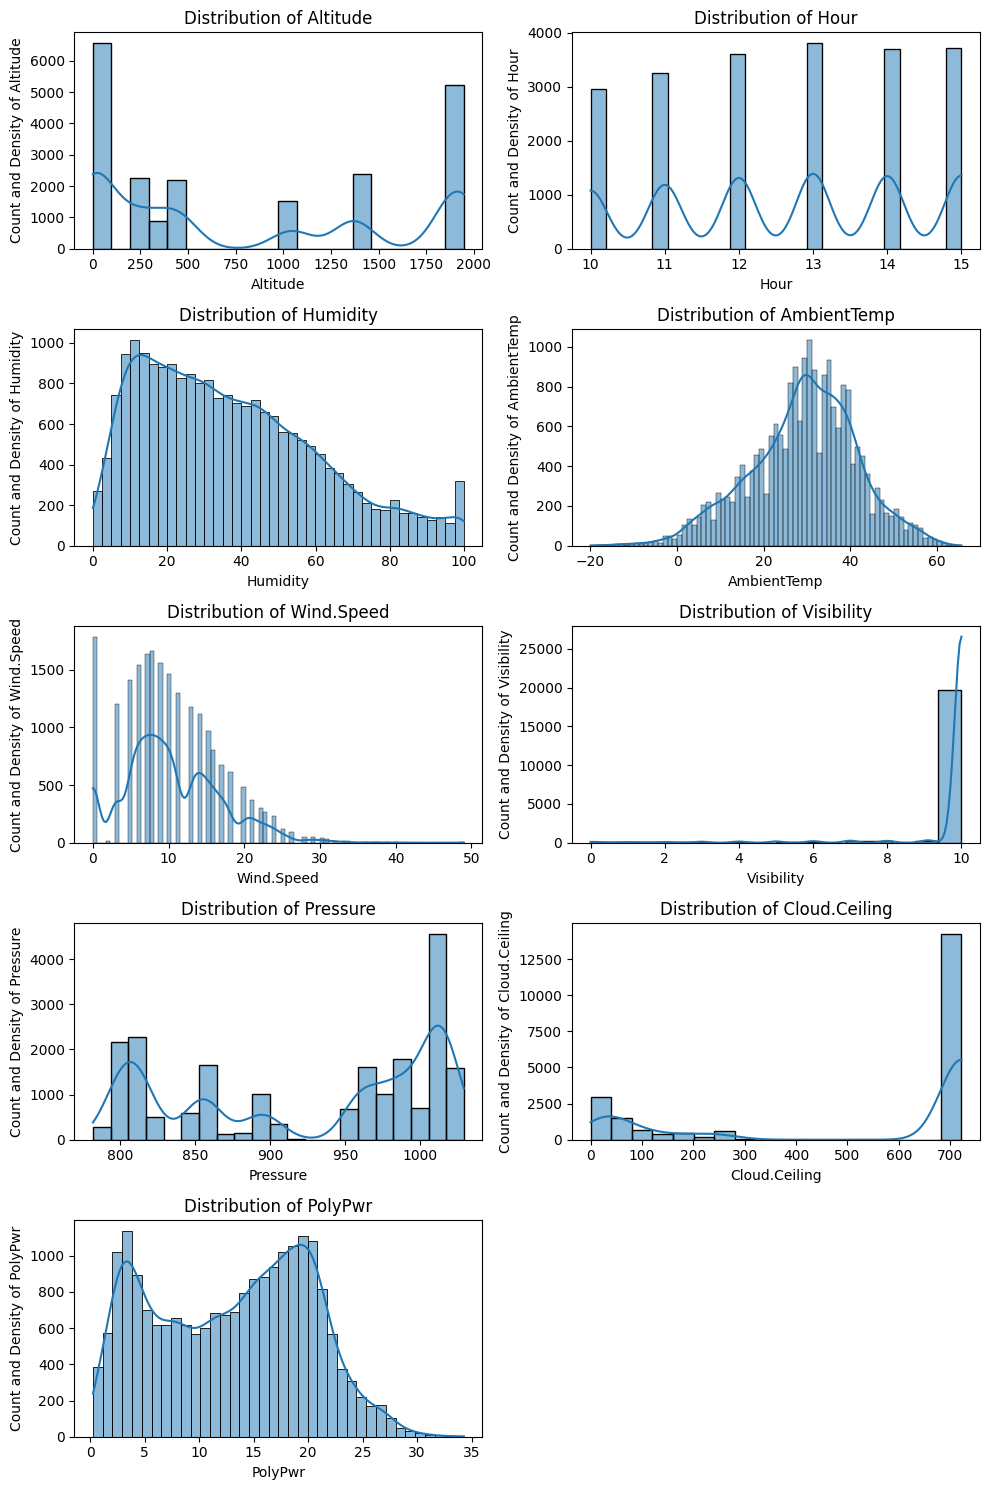

In [20]:
# Histplot with kde

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.histplot(ax=axes[i], x=df[nums[i]], kde=True)
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

    plt.tight_layout()

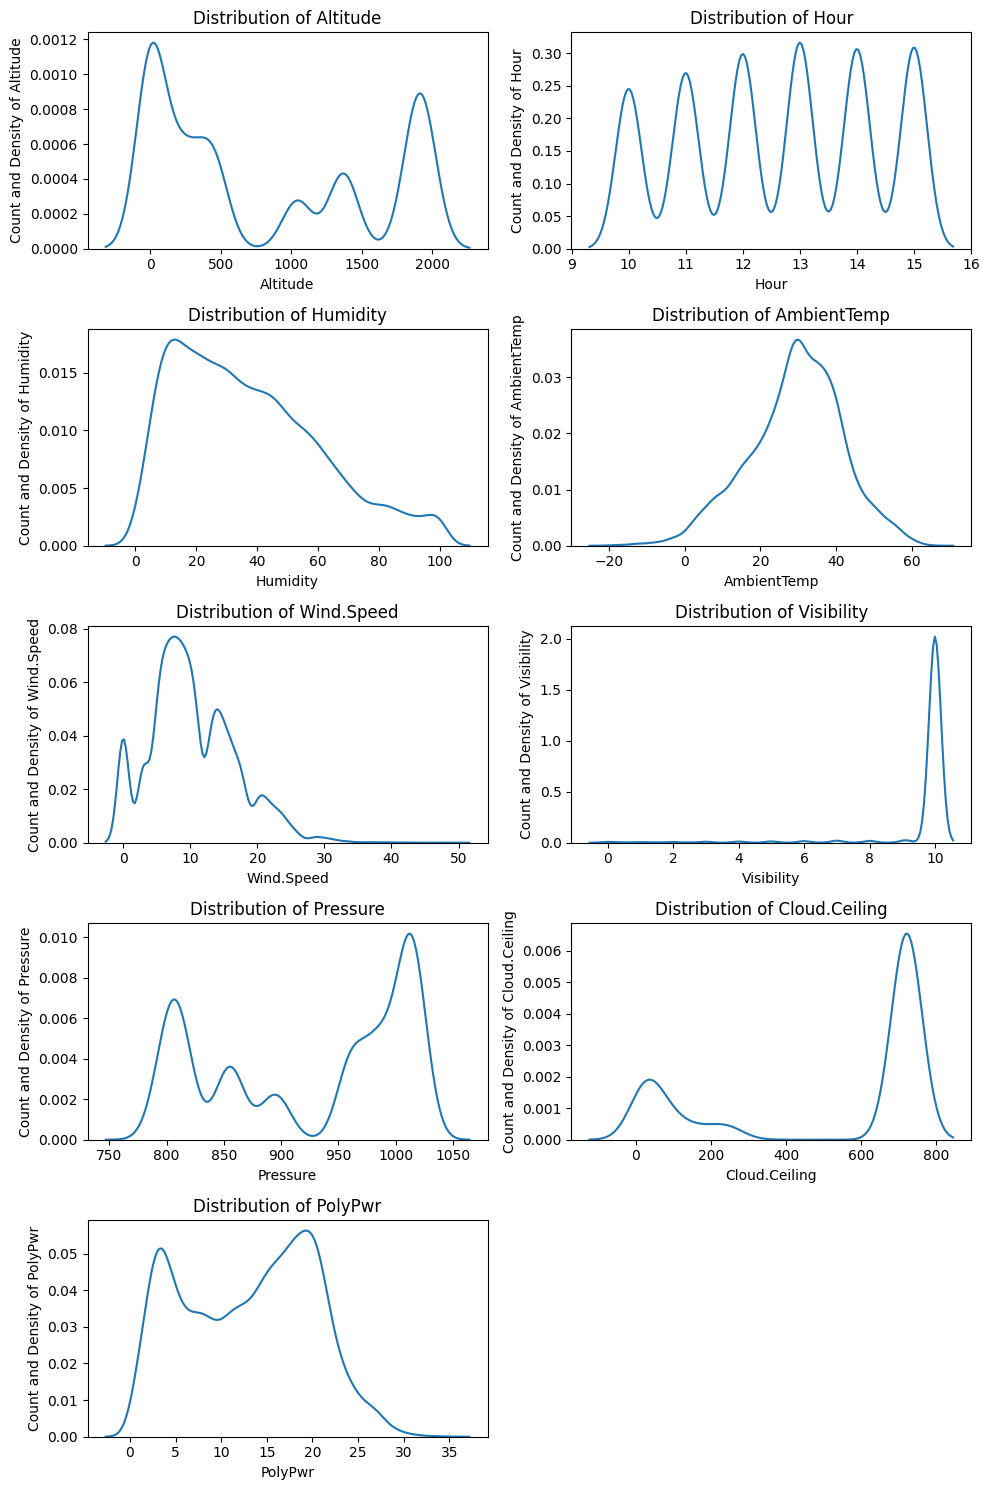

In [21]:
# Focusing only on kde

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,15))
axes = axes.flatten()

for i in range(len(nums)) :
    sns.kdeplot(ax=axes[i], x=df[nums[i]])
    axes[i].set_title(f'Distribution of {nums[i]}')
    axes[i].set_ylabel(f'Count and Density of {nums[i]}')
    axes[i].set_xlabel(f'{nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes) :
    axes[len(nums)].remove()

    plt.tight_layout()

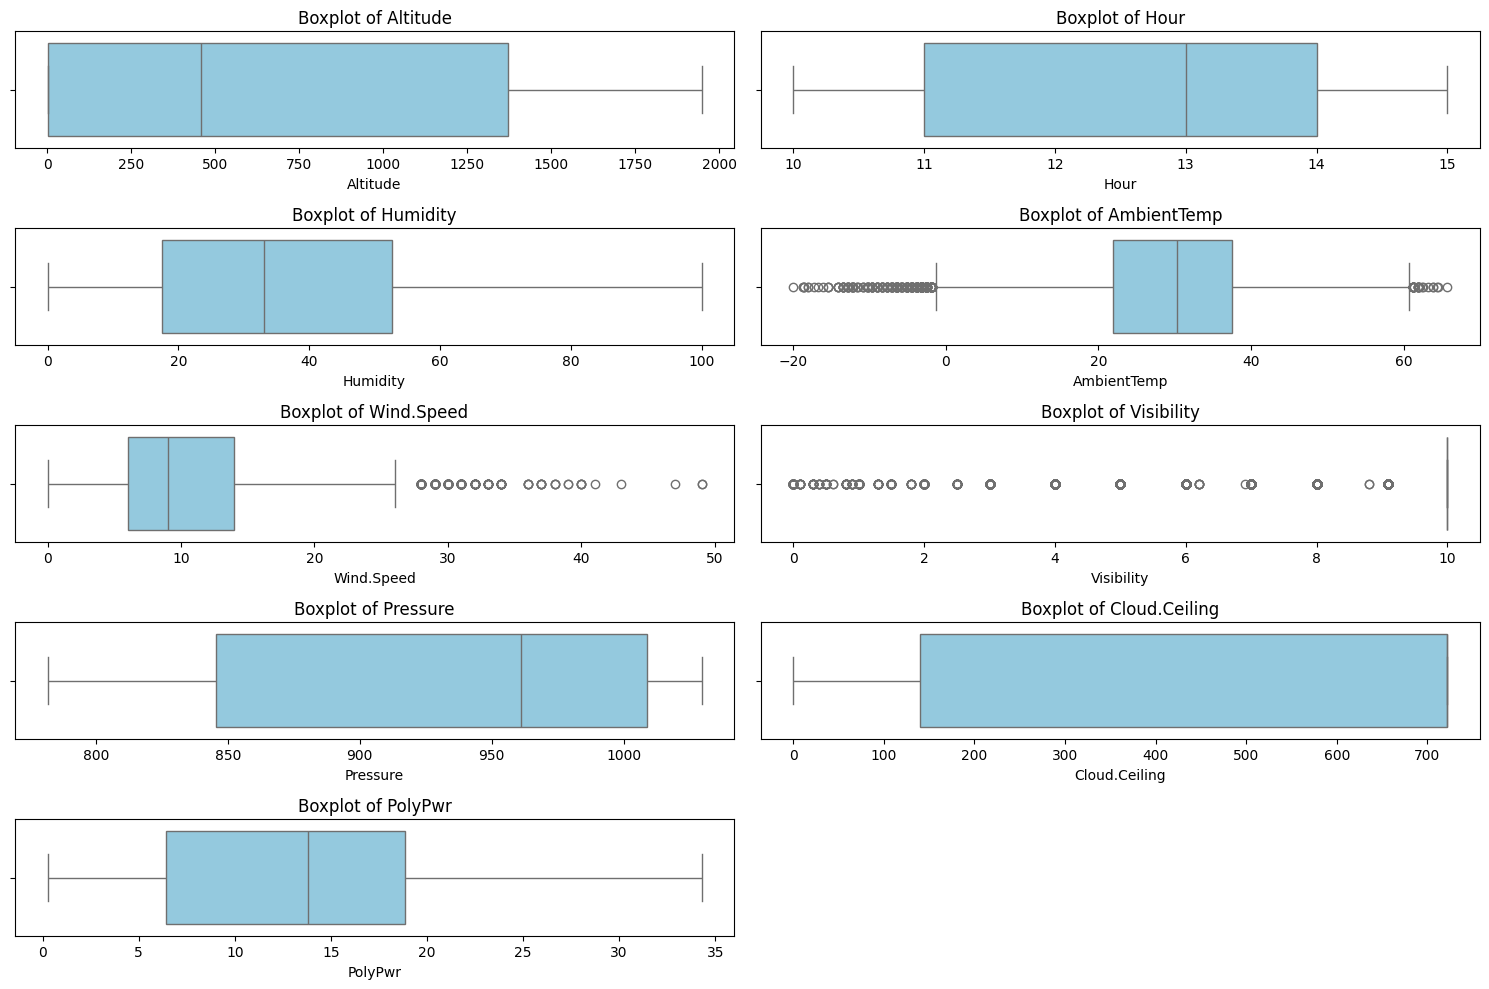

In [22]:
# Boxplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.boxplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

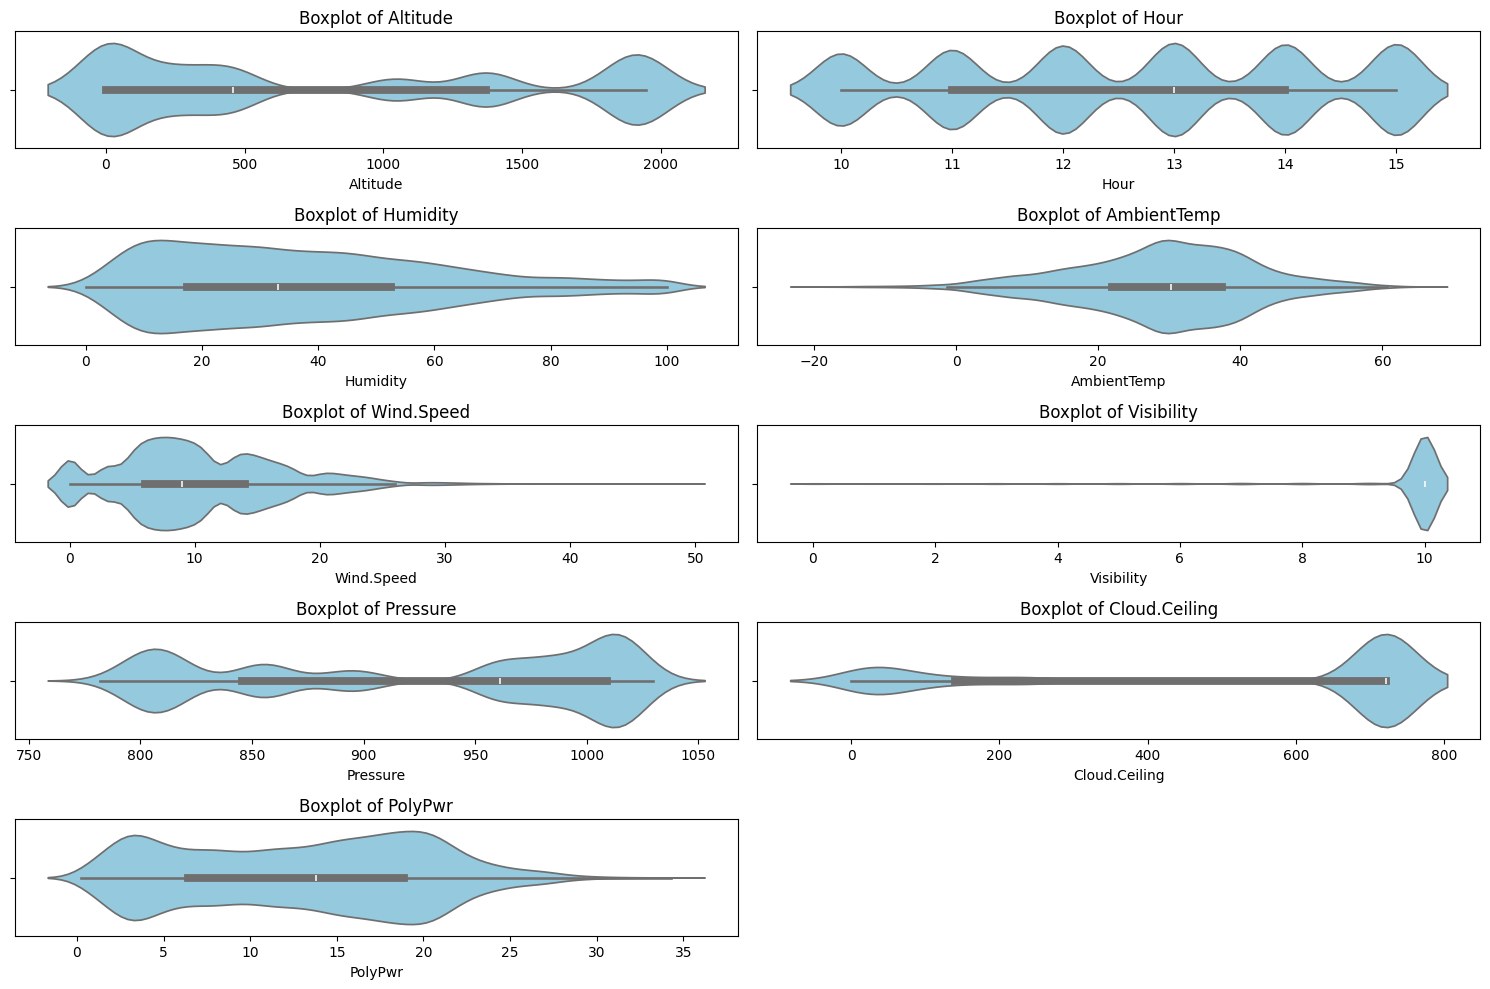

In [23]:
# Violinplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i in range(len(nums)) :
  sns.violinplot(ax=axes[i], x=df[nums[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {nums[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(nums) < len(axes):
    axes[len(nums)].remove()

plt.tight_layout()

There are not many features with outliers, only AmbientTemp, Wind.Speed, and Visibility

## Categorical Columns

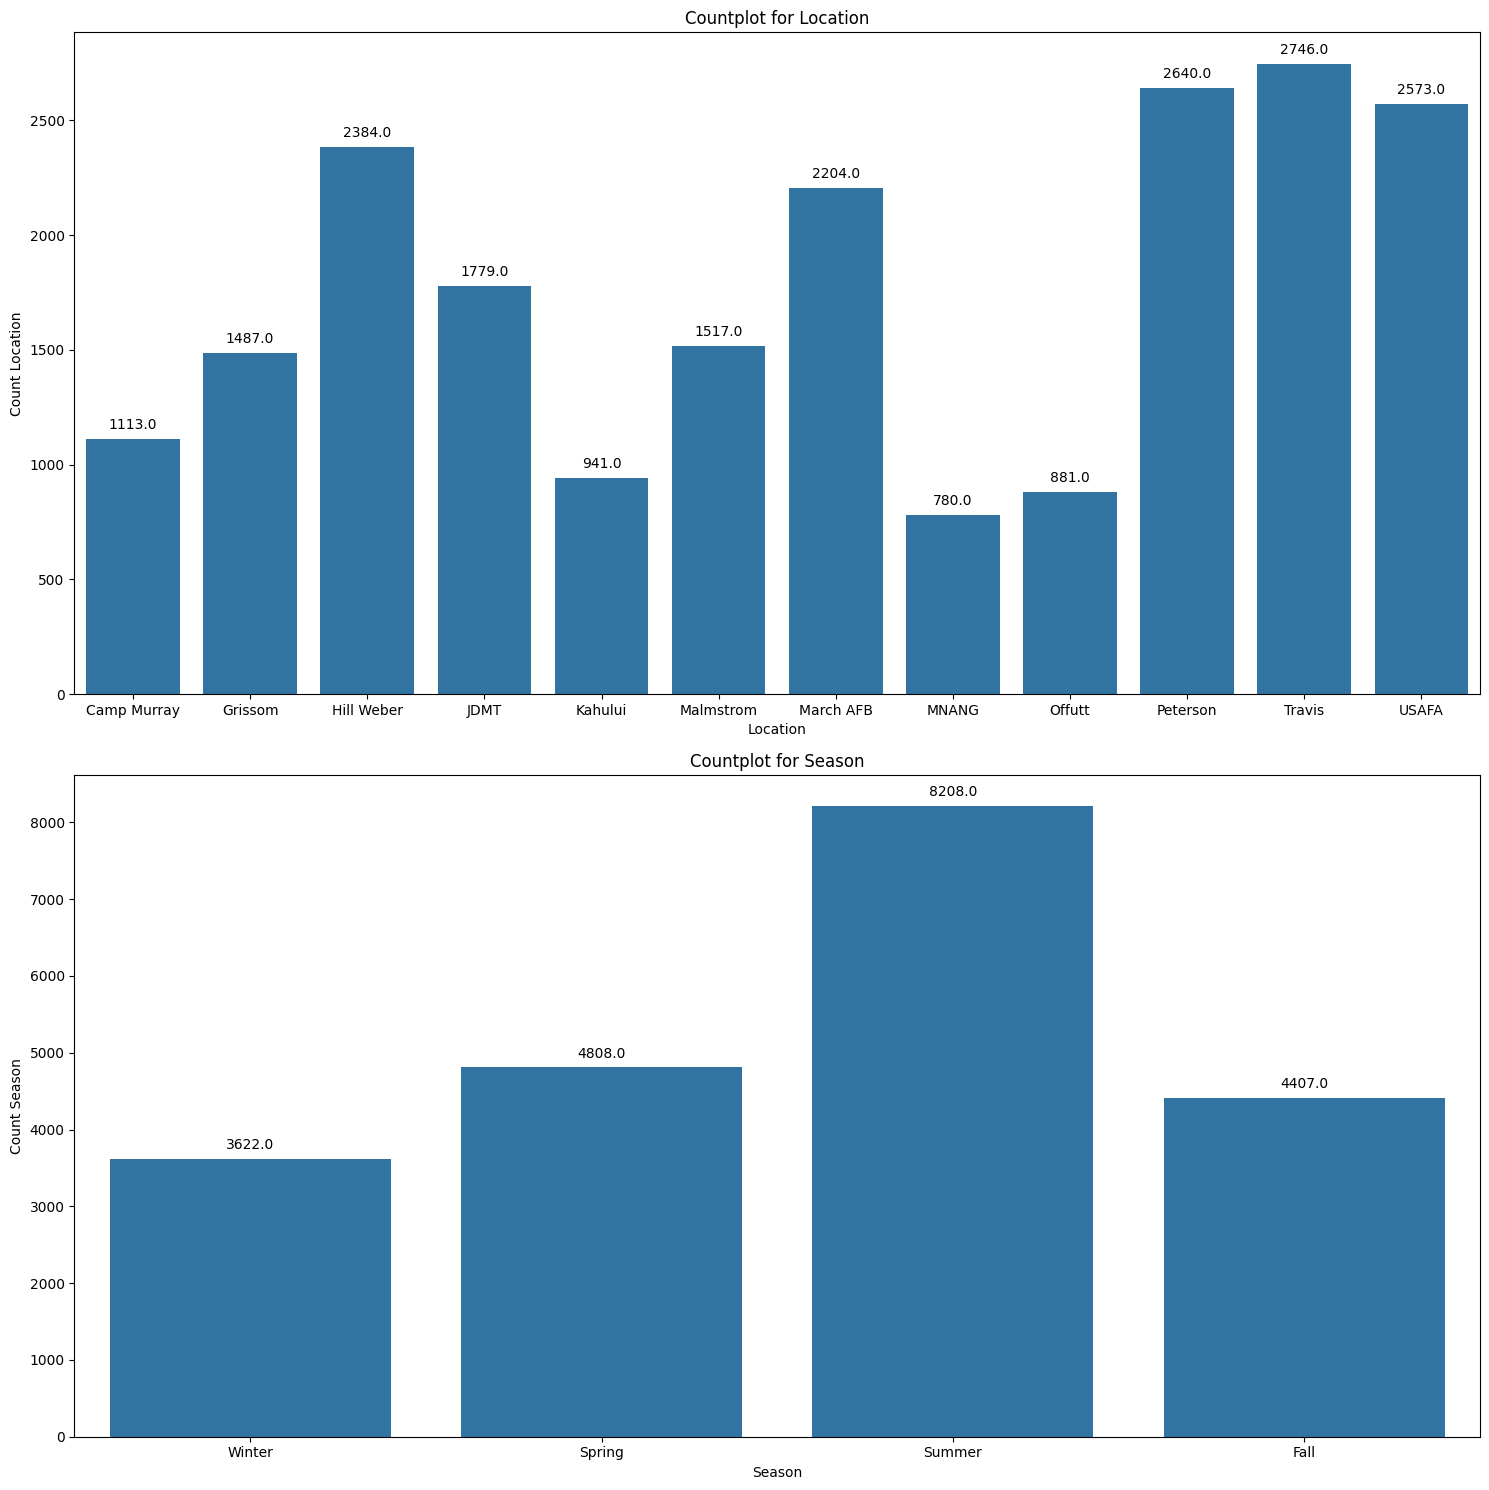

In [24]:
#Countplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

for i in range(len(cats)):
    ax = sns.countplot(ax=axes[i], x=df[cats[i]])
    axes[i].set_title(f'Countplot for {cats[i]}')
    axes[i].set_ylabel(f'Count {cats[i]}')
    axes[i].tick_params(axis='x')

    # Adding annotations on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


# Bivariate/Multivariate Analysis

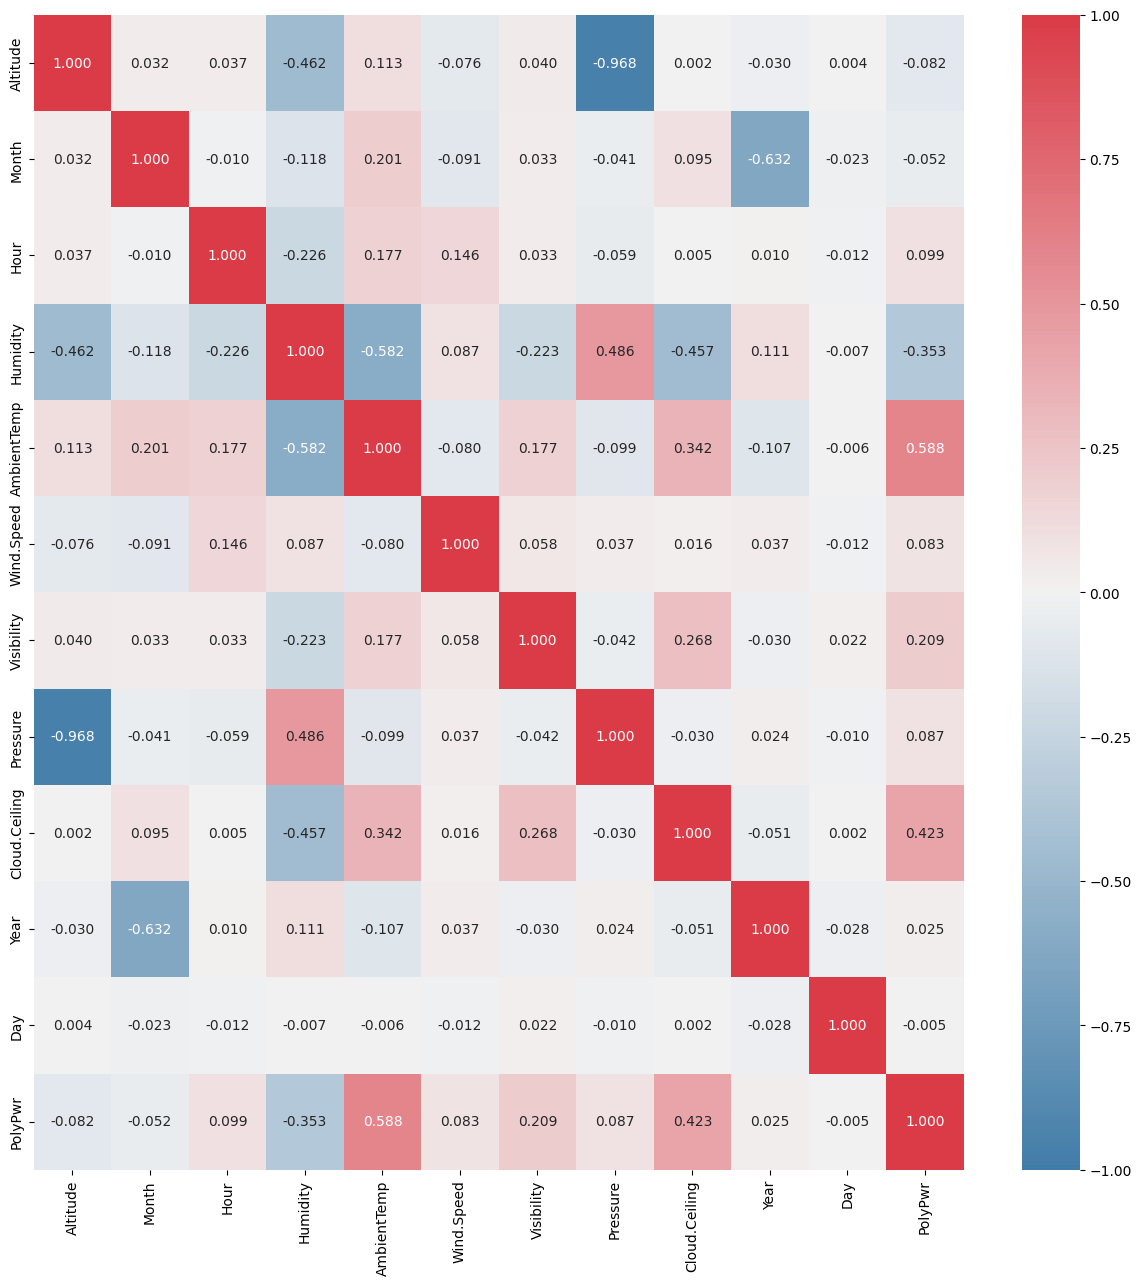

In [25]:
# Heatmap (corr spearman)
plt.figure(figsize=(15,15))
cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(data = df.corr(numeric_only=True, method='spearman'), cmap=cmap_custom, annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In this case we use spearman correlation that is more robust/accurate in capturing non-linear (can be seen from pairplot down below) correlation of features. Some feature that have high correlation to target are Humidity, AmbientTemp, Visibility, and Cloud.Ceiling. We also likely to drop or not use Altitude feature since it has really high correlation to Pressure to avoid multicollinearity.

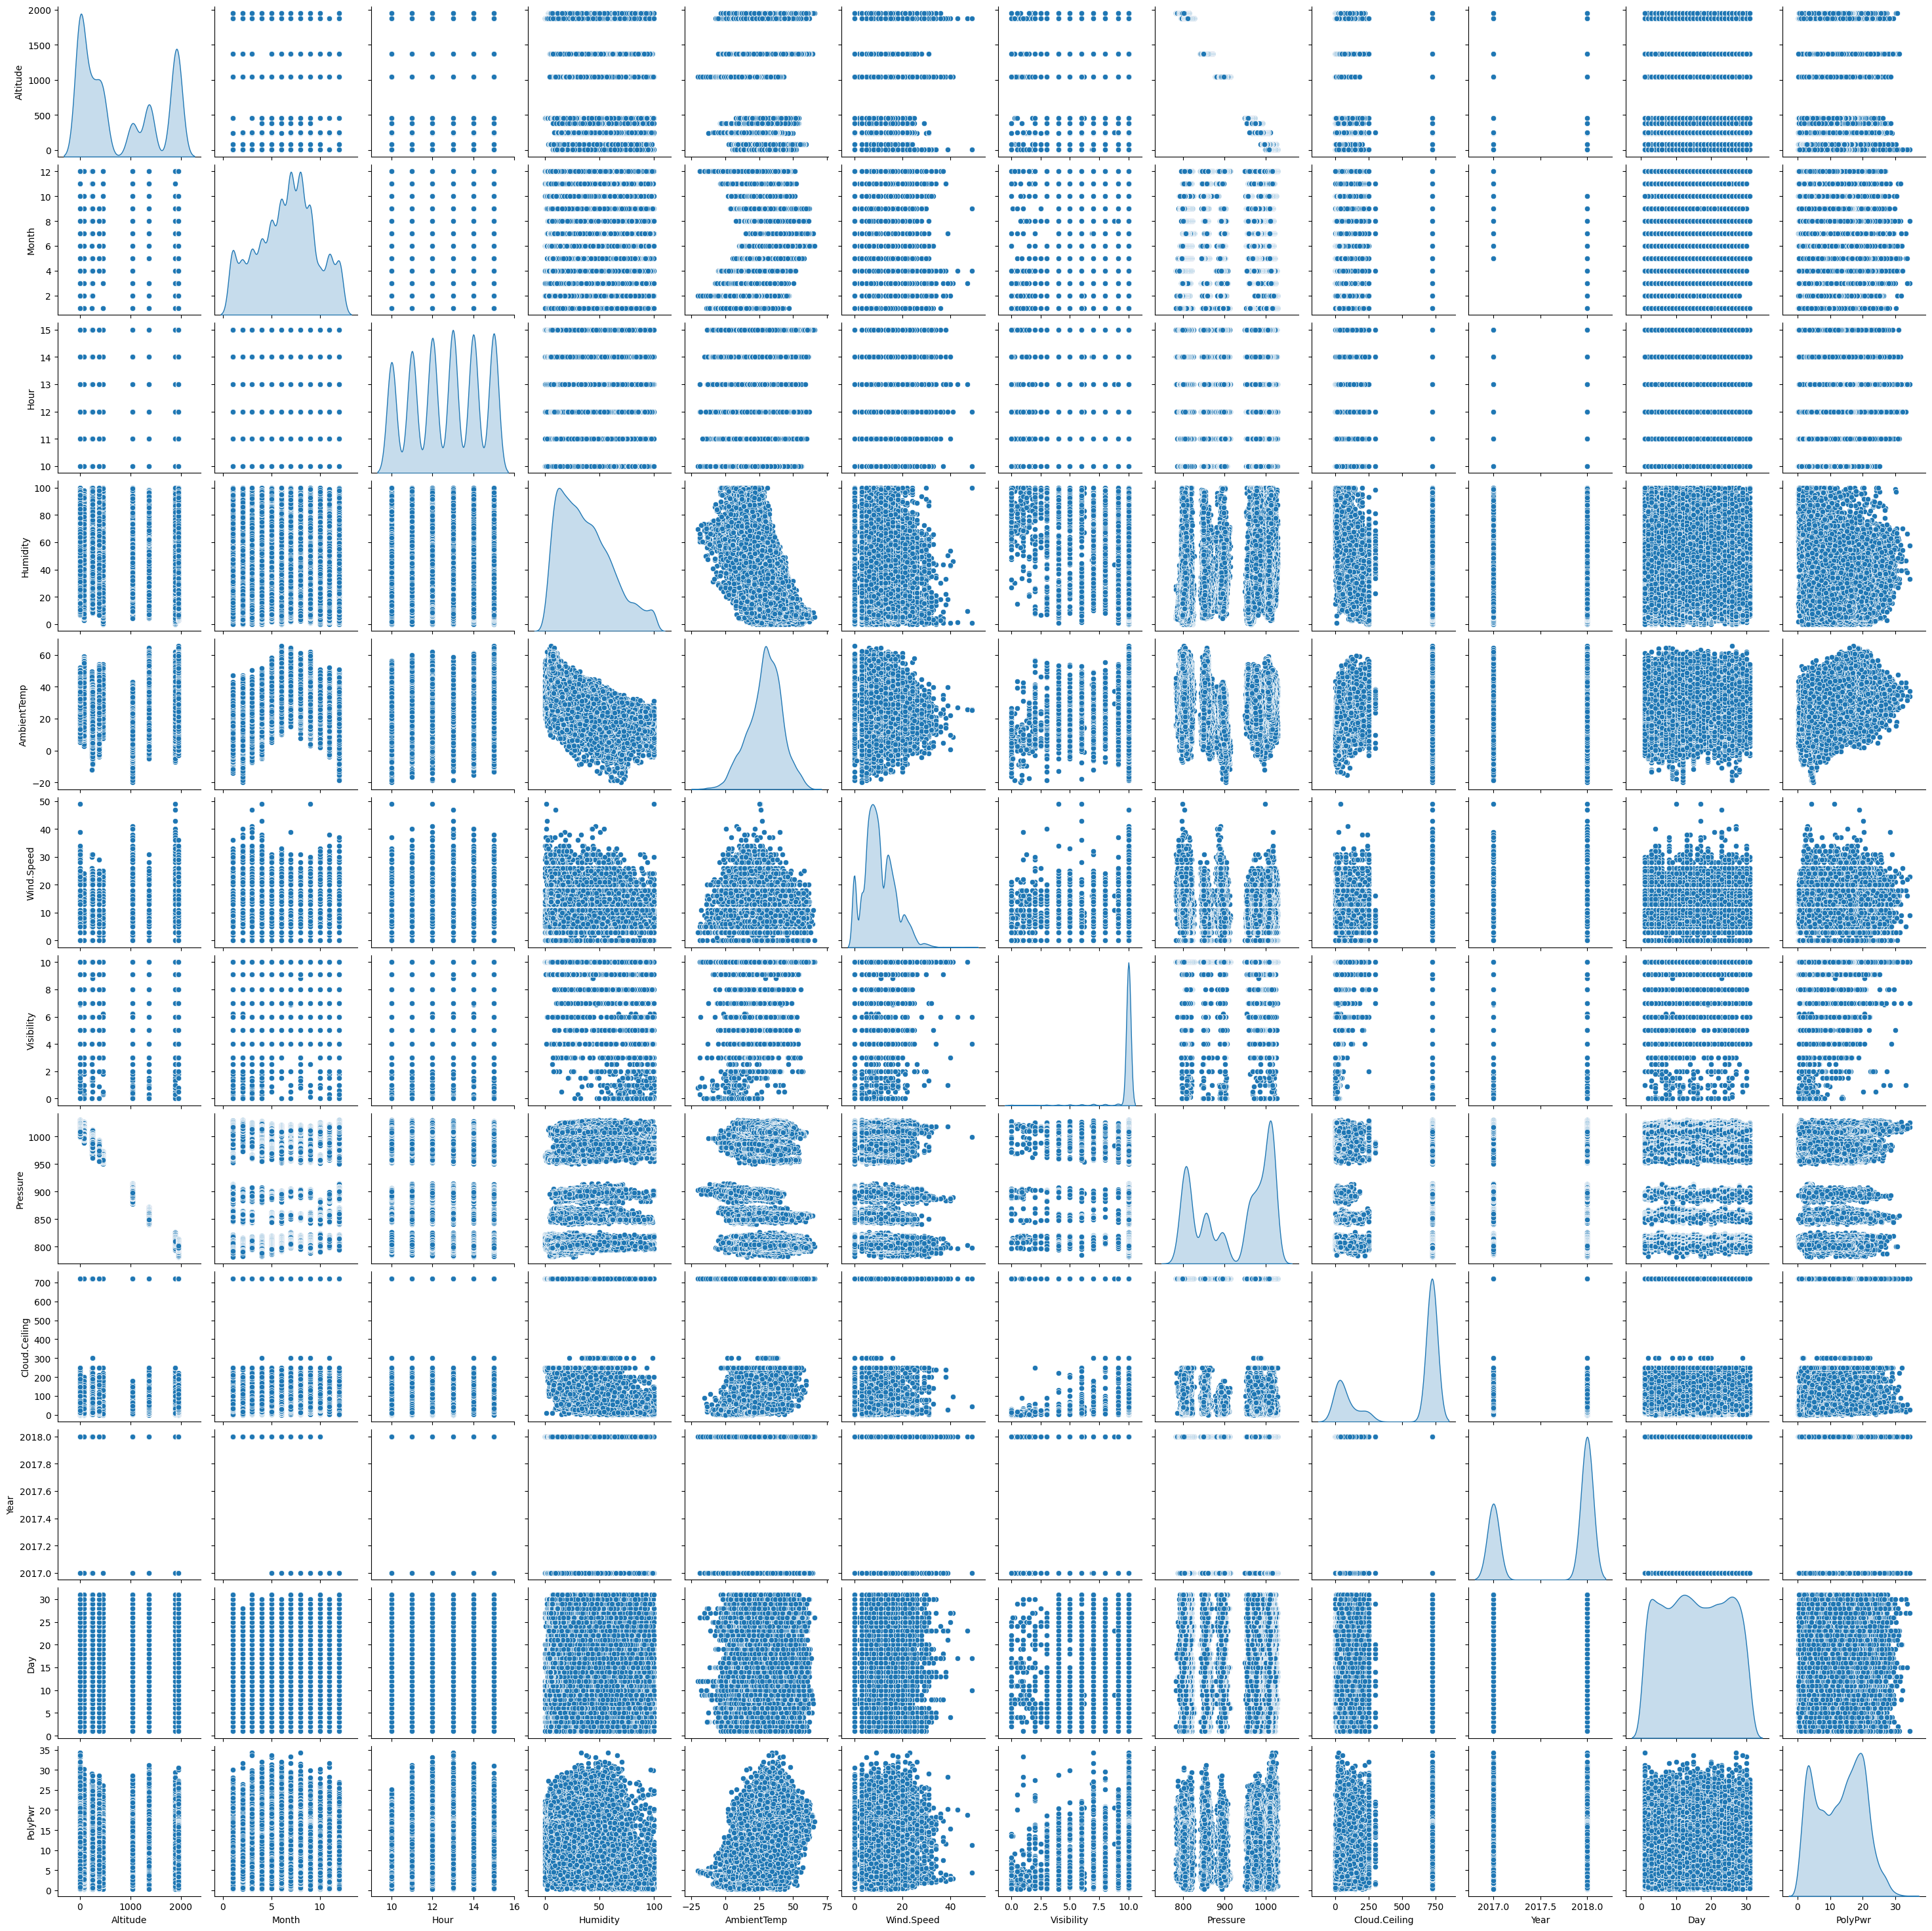

In [26]:
# Pairplot
sns.pairplot(df, diag_kind='kde')
plt.show()

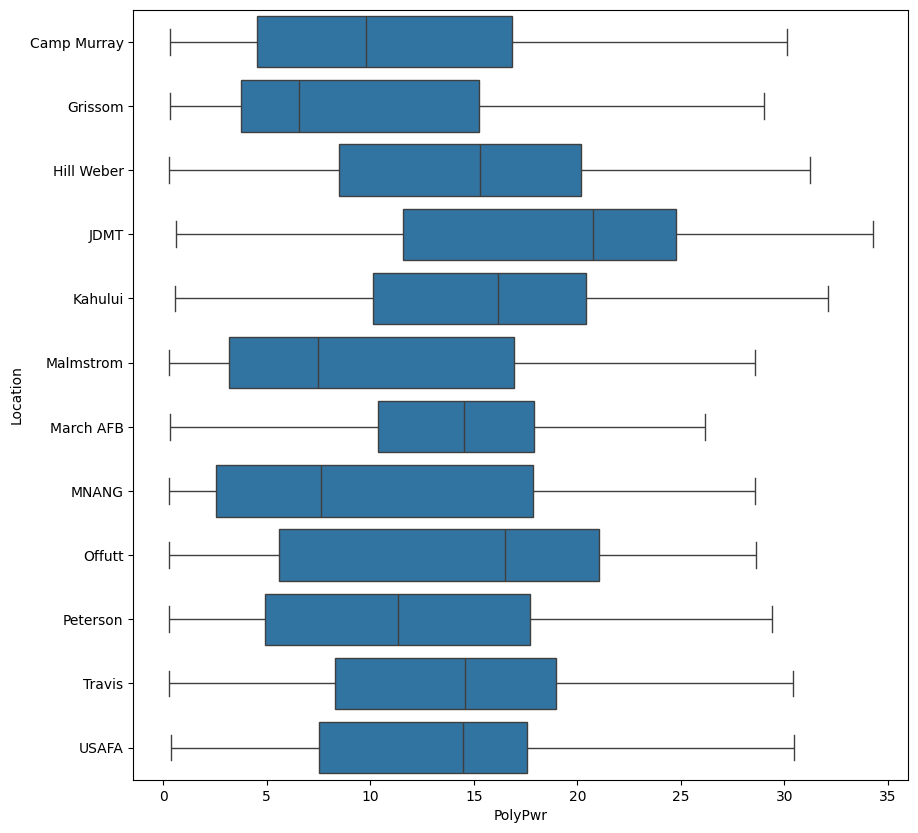

In [27]:
#Boxplot of PolyPwr by Location
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='PolyPwr', y='Location')
plt.show()

In [28]:
#Mean PolyPwr by Season
df_mean_power_season = df.groupby('Season').agg({'PolyPwr' : ['mean']})
df_mean_power_season

PolyPwr
             mean
Season           
Fall    11.167499
Spring  14.192405
Summer  15.320546
Winter   8.263660

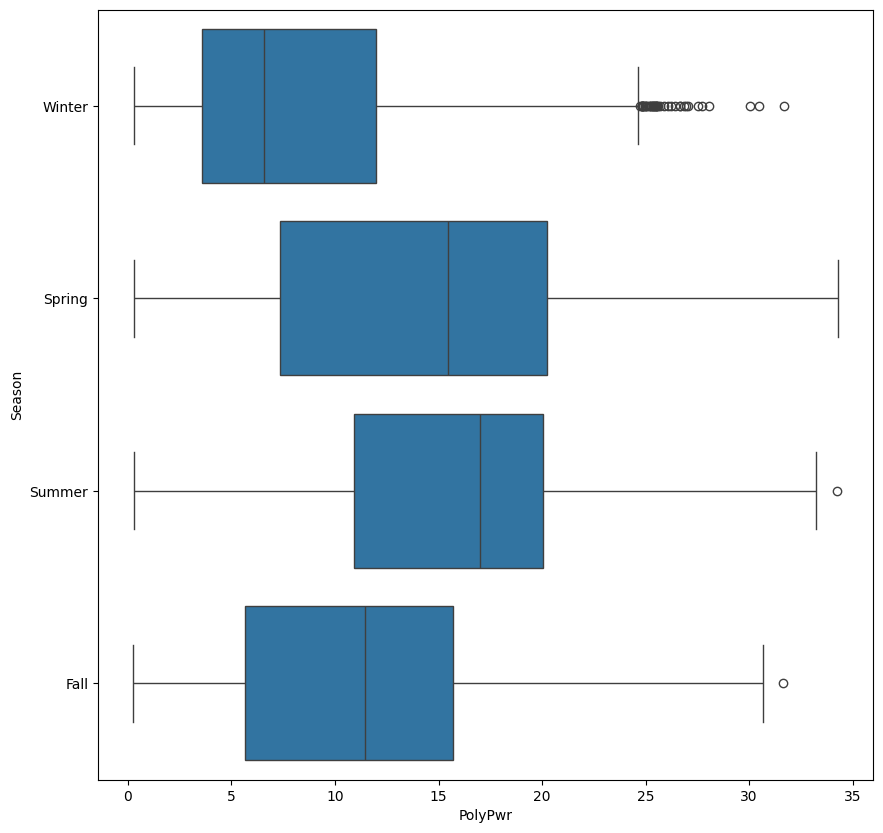

In [29]:
#Boxplot of PolyPwr by Season
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='PolyPwr', y='Season')
plt.show()

Summer as expected have the highest median PolyPwr with the lowest variability and highest overall mean of PolyPwr from all season

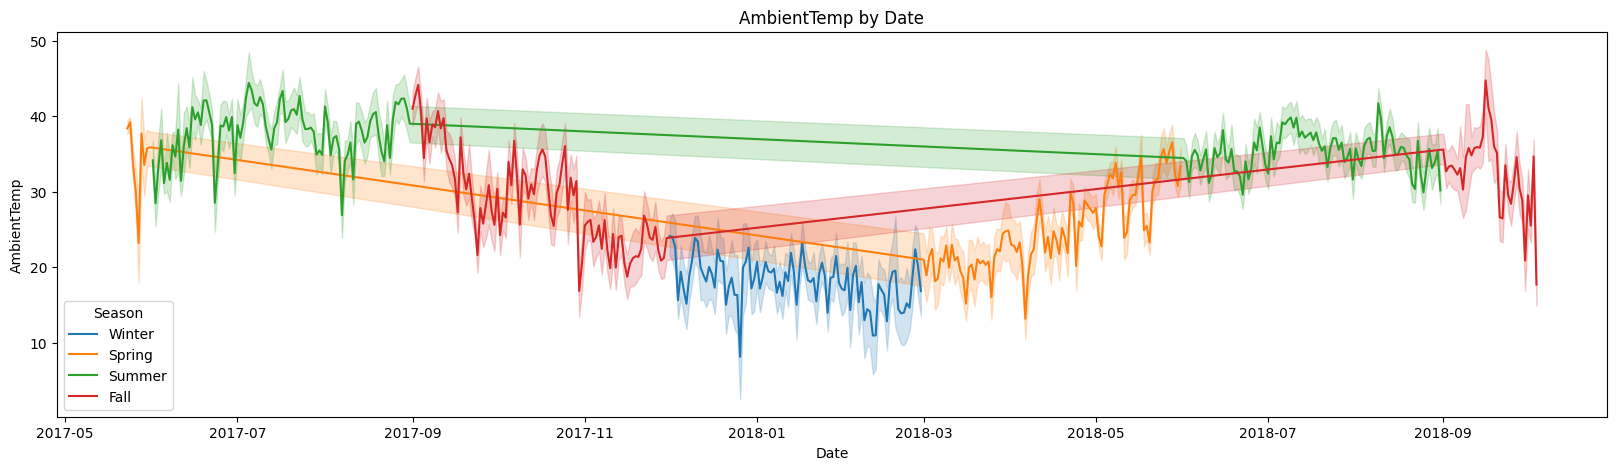

In [47]:
#AmbientTemp by Date per Season
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='Date', y='AmbientTemp', hue='Season')
plt.ylabel('AmbientTemp')
plt.xlabel('Date')
plt.title('AmbientTemp by Date')
plt.show()

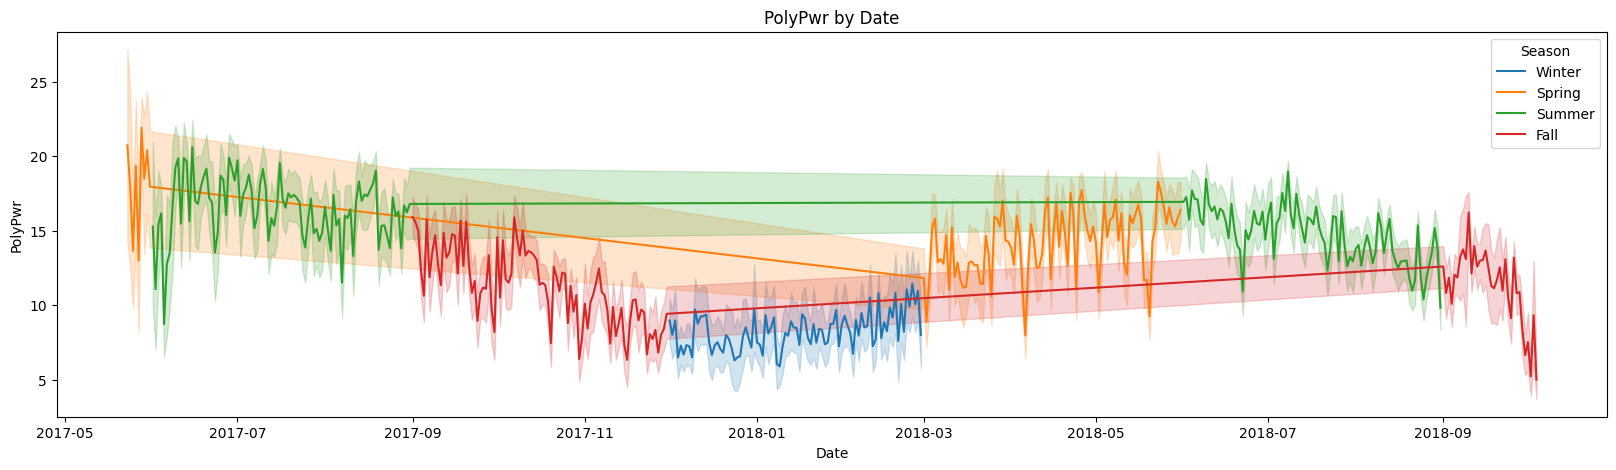

In [48]:
#Polypwr by Date per Season
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='Date', y='PolyPwr', hue='Season')
plt.ylabel('PolyPwr')
plt.xlabel('Date')
plt.title('PolyPwr by Date')
plt.show()

The ambient temperature does have the same trend with PolyPwr generated where it went down during Winter

At first, I wanted to create a PolyPwr plot by hour because from my experience learning about solar cell irradiation, there is something called peak hours. These are periods during the day when solar radiation reaches its highest intensity, and solar cells receive sunlight with maximum intensity, resulting in optimal electricity production. However, I just realized that the 'Hour' feature in this dataset only represents the peak hours, not all hours in a day. Additionally, the distribution, as seen in the pair plot, does not allow for depicting a curve that typically has a peak shape during peak hours.

# Pre-Processing & Feature Engineering

In [30]:
# Make a copy of original dataframe for preprocessing and encoding process

df_encoding = df.copy()

df_encoding.sample(5)

Location       Date  Altitude  Month  Hour  Season  Humidity  \
2646   Hill Weber 2017-06-27      1370      6    11  Summer  20.55664   
224   Camp Murray 2018-02-18        84      2    13  Winter  77.35596   
8176    Malmstrom 2018-03-15      1043      3    11  Spring  89.80103   
742   Camp Murray 2018-07-23        84      7    12  Summer  11.82861   
2462      Grissom 2018-09-02       239      9    11    Fall  51.39771   

      AmbientTemp  Wind.Speed  Visibility  Pressure  Cloud.Ceiling  Year  Day  \
2646     34.83360          14        10.0     851.3            722  2017   27   
224       7.73056           8         4.0     994.8             16  2018   18   
8176      5.11971          11         6.0     882.2             16  2018   15   
742      49.03595           7        10.0    1008.2            722  2018   23   
2462     36.18813          10        10.0     992.1            722  2018    2   

       PolyPwr  
2646  23.17741  
224    3.48301  
8176   3.23674  
742   19.42950  
2462  11.97854

In [31]:
# Drop features that are irrelevant and we will not use for this modelling case

df_encoding = df_encoding.drop(columns=['Date', 'Altitude', 'Year'])

In [32]:
# One-hot encoding for Location

onehots = pd.get_dummies(df_encoding['Location'], prefix='Location')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

#Drop the Location after one-hot encoding
df_encoding.drop(columns='Location', inplace=True)

In [33]:
# One-hot encoding for Season

onehots = pd.get_dummies(df_encoding['Season'], prefix='Season')
onehots = onehots.astype(int)
df_encoding = df_encoding.join(onehots)

#Drop the Location after one-hot encoding
df_encoding.drop(columns='Season', inplace=True)

In [34]:
#Check dataframe after encoding and drop irrelevant features
df_encoding

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
0         12    11  81.71997     12.86919           5        10.0    1010.6   
1         12    13  96.64917      9.66415           0        10.0    1011.3   
2         12    13  93.61572     15.44983           5        10.0    1011.6   
3         12    12  77.21558     10.36659           5         2.0    1024.4   
4         12    14  54.80347     16.85471           3         3.0    1023.7   
...      ...   ...       ...          ...         ...         ...       ...   
21040      9    15  11.66992     43.22510          14        10.0     802.3   
21041      9    13  18.22510     28.98247          13        10.0     799.2   
21042      9    14  15.52124     33.49167          10        10.0     798.4   
21043      9    15   6.63452     51.62163          10        10.0     797.8   
21044     10    14  22.58301     32.83958          15        10.0     801.2   

       Cloud.Ceiling  Day   PolyPwr  Location_Camp Murray  Location_Grissom  \
0                722    3   2.42769                     1                 0   
1                 23    3   2.46273                     1                 0   
2                 32    3   4.46836                     1                 0   
3                  6    4   1.65364                     1                 0   
4                  9    4   6.57939                     1                 0   
...              ...  ...       ...                   ...               ...   
21040            722   28   9.79611                     0                 0   
21041            722   29  10.88992                     0                 0   
21042            722   29   8.24479                     0                 0   
21043            722   29  12.47328                     0                 0   
21044            110    1   6.39732                     0                 0   

       Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
0                        0              0                 0               0   
1                        0              0                 0               0   
2                        0              0                 0               0   
3                        0              0                 0               0   
4                        0              0                 0               0   
...                    ...            ...               ...             ...   
21040                    0              0                 0               0   
21041                    0              0                 0               0   
21042                    0              0                 0               0   
21043                    0              0                 0               0   
21044                    0              0                 0               0   

       Location_Malmstrom  Location_March AFB  Location_Offutt  \
0                       0                   0                0   
1                       0                   0                0   
2                       0                   0                0   
3                       0                   0                0   
4                       0                   0                0   
...                   ...                 ...              ...   
21040                   0                   0                0   
21041                   0                   0                0   
21042                   0                   0                0   
21043                   0                   0                0   
21044                   0                   0                0   

       Location_Peterson  Location_Travis  Location_USAFA  Season_Fall  \
0                      0                0               0            0   
1                      0                0               0            0   
2                      0                0               0            0   
3                      0                0               0            0 

In [35]:
# Re-arrange the columns (PolyPwr in last)
df_1 = df_encoding.drop(columns='PolyPwr')
df_2 = df_encoding['PolyPwr']
df_encoding = pd.concat([df_1, df_2], axis='columns')

# Feature Selection

At first we will just use all the features that we got after pre-processing, this part is just additional check to compare the result with df.corr() to see what will best features for prediction later

In [36]:
# Create temporary dataframe for testing SelectKBest

df_feature_target_relation = df_encoding.copy()
df_feature_target_relation.head()

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
0     12    11  81.71997     12.86919           5        10.0    1010.6   
1     12    13  96.64917      9.66415           0        10.0    1011.3   
2     12    13  93.61572     15.44983           5        10.0    1011.6   
3     12    12  77.21558     10.36659           5         2.0    1024.4   
4     12    14  54.80347     16.85471           3         3.0    1023.7   

   Cloud.Ceiling  Day  Location_Camp Murray  Location_Grissom  \
0            722    3                     1                 0   
1             23    3                     1                 0   
2             32    3                     1                 0   
3              6    4                     1                 0   
4              9    4                     1                 0   

   Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
0                    0              0                 0               0   
1                    0              0                 0               0   
2                    0              0                 0               0   
3                    0              0                 0               0   
4                    0              0                 0               0   

   Location_Malmstrom  Location_March AFB  Location_Offutt  Location_Peterson  \
0                   0                   0                0                  0   
1                   0                   0                0                  0   
2                   0                   0                0                  0   
3                   0                   0                0                  0   
4                   0                   0                0                  0   

   Location_Travis  Location_USAFA  Season_Fall  Season_Spring  Season_Summer  \
0                0               0            0              0              0   
1                0               0            0              0              0   
2                0               0            0              0              0   
3                0               0            0              0              0   
4                0               0            0              0              0   

   Season_Winter  PolyPwr  
0              1  2.42769  
1              1  2.46273  
2              1  4.46836  
3              1  1.65364  
4              1  6.57939

In [37]:
#Calculation of feature importance score to target (numerical/categorical feature - categorical target)

from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['PolyPwr'])  # Features
y_target_test = df_feature_target_relation['PolyPwr']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_regression, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores and feature names
feature_scores = k_best.scores_
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores
print(feature_scores_df)

                 Feature     Score
3            AmbientTemp  0.296641
6               Pressure  0.201022
0                  Month  0.193902
7          Cloud.Ceiling  0.164230
2               Humidity  0.161456
24         Season_Winter  0.093413
23         Season_Summer  0.073100
15    Location_Malmstrom  0.068628
12         Location_JDMT  0.062617
1                   Hour  0.060982
21           Season_Fall  0.038871
18     Location_Peterson  0.034669
10      Location_Grissom  0.034302
5             Visibility  0.033428
20        Location_USAFA  0.031959
11   Location_Hill Weber  0.029751
19       Location_Travis  0.027573
9   Location_Camp Murray  0.025987
16    Location_March AFB  0.025222
22         Season_Spring  0.017514
8                    Day  0.016955
4             Wind.Speed  0.014253
14        Location_MNANG  0.014092
13      Location_Kahului  0.012088
17       Location_Offutt  0.010754


As we can see that AmbientTemp still hold as the most important feature to target similar to what we got before, but interestingly the Pressure feature score is high this is different from what we got using df.corr(), we will see the result whether this is true or not in the modelling process

# Train-Test Split

In [38]:
# Spliting data into train-test
x = df_encoding.drop(columns=['PolyPwr'])
y = df_encoding[['PolyPwr']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Handling Outliers

It is generally recommended to handle outliers based on the training data only. The reason for this is to simulate real-world conditions during the testing phase. Handling outliers in the test set could potentially distort the evaluation of the model's performance on unseen data.

Here's the typical process:

1. **Handling outliers in the training data:** Identify and handle outliers using methods like IQR (Interquartile Range) or Z-score on the training dataset. This helps the model learn from a cleaner dataset and improves its generalization.

2. **Applying the same transformation to the test data:** Use the same parameters (like median and standard deviation for Z-score) obtained from the training data to handle outliers in the test data. This ensures consistency and reflects the real-world scenario where the model encounters new, unseen data with potential outliers.

By following this approach, you are testing the model on data that resembles what it might encounter in the real world, including outliers. This provides a more accurate assessment of how well the model generalizes to new, unseen data.

In [39]:
#Make temporary dataframe of features and target for train set
df_train_handling_outliers = pd.concat([x_train, y_train], axis='columns')

In [40]:
columns_to_handle_outliers = ['AmbientTemp', 'Wind.Speed', 'Visibility']

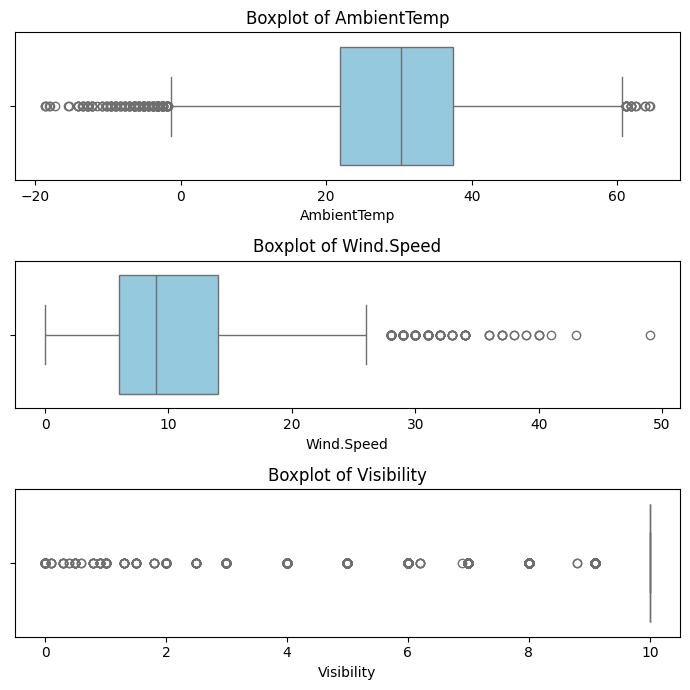

In [41]:
# Boxplot before handling outliers
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [42]:
# Remove outliers with IQR method

print(f'The number of rows before filtering out outliers : {len(df_train_handling_outliers)}')

filtered_entries = np.array([True] * len(df_train_handling_outliers))

# Select features with outliers
for col in columns_to_handle_outliers:

    Q1 = df_train_handling_outliers[col].quantile(0.25)
    Q3 = df_train_handling_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train_handling_outliers[col] >= lower_bound) & (df_train_handling_outliers[col] <= upper_bound)) & filtered_entries

df_train_handling_outliers = df_train_handling_outliers[filtered_entries]

print(f'The number of rows after filtering out outliers: {len(df_train_handling_outliers)}')

The number of rows before filtering out outliers : 14731
The number of rows after filtering out outliers: 13478


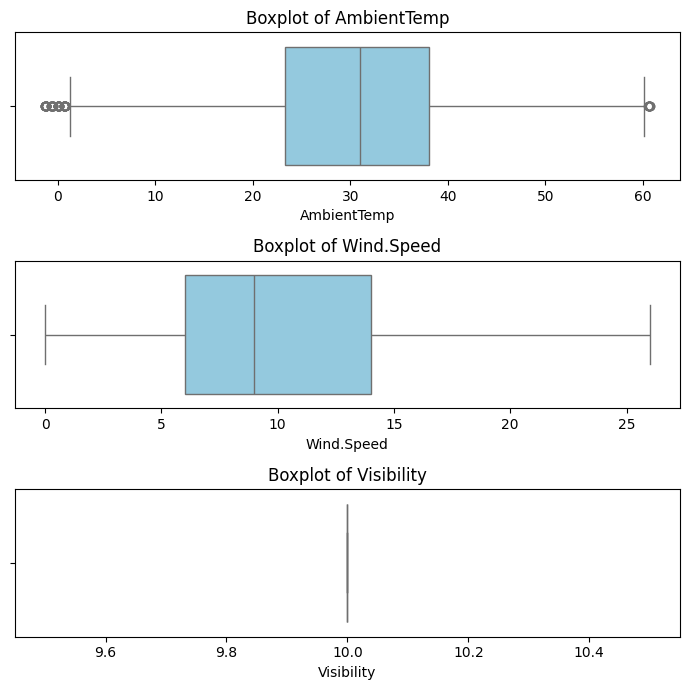

In [43]:
# Boxplot after handling outliers
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7, 7))
axes = axes.flatten()

for i in range(len(columns_to_handle_outliers)) :
  sns.boxplot(ax=axes[i], x=df_train_handling_outliers[columns_to_handle_outliers[i]], orient='h', color='skyblue')
  axes[i].set_title(f'Boxplot of {columns_to_handle_outliers[i]}')


# Remove the last subplot if there are fewer features than subplots
if len(columns_to_handle_outliers) < len(axes):
    axes[len(columns_to_handle_outliers)].remove()

plt.tight_layout()

In [44]:
#Split the features and target for train set again
x_train = df_train_handling_outliers.drop(columns='PolyPwr')
y_train = df_train_handling_outliers['PolyPwr']

# Feature Scaling

Scaling will be done to train and test data

In [45]:
x_train

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
13683      9    15  52.72217     18.71025           8        10.0     814.5   
6340       2    11  44.03687     35.53352          17        10.0    1023.7   
2820       7    10  31.54907     31.59836          14        10.0     856.9   
6427       3    13  36.07178     33.56720          17        10.0    1008.8   
20948      9    14  25.37231     39.40575          13        10.0     807.8   
...      ...   ...       ...          ...         ...         ...       ...   
11284      8    14  25.92163     35.43030           8        10.0     960.1   
11964      8    15  60.22949     28.32787          14        10.0     984.9   
5390       8    12  42.46216     42.57805           5        10.0    1019.3   
860        8    10  60.41870     24.49341           3        10.0    1010.9   
15795      6    11  30.32837     37.44194          11        10.0    1006.9   

       Cloud.Ceiling  Day  Location_Camp Murray  Location_Grissom  \
13683             34   26                     0                 0   
6340             722   24                     0                 0   
2820             722   28                     0                 0   
6427              37   12                     0                 0   
20948             32    6                     0                 0   
...              ...  ...                   ...               ...   
11284            722   26                     0                 0   
11964             60   16                     0                 0   
5390             722    2                     0                 0   
860               18   12                     1                 0   
15795            722   20                     0                 0   

       Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
13683                    0              0                 0               0   
6340                     0              1                 0               0   
2820                     1              0                 0               0   
6427                     0              1                 0               0   
20948                    0              0                 0               0   
...                    ...            ...               ...             ...   
11284                    0              0                 0               0   
11964                    0              0                 0               1   
5390                     0              1                 0               0   
860                      0              0                 0               0   
15795                    0              0                 0               0   

       Location_Malmstrom  Location_March AFB  Location_Offutt  \
13683                   0                   0                0   
6340                    0                   0                0   
2820                    0                   0                0   
6427                    0                   0                0   
20948                   0                   0                0   
...                   ...                 ...              ...   
11284                   0                   1                0   
11964                   0                   0                0   
5390                    0                   0                0   
860                     0                   0                0   
15795                   0                   0                0   

       Location_Peterson  Location_Travis  Location_USAFA  Season_Fall  \
13683                  1                0               0            1   
6340                   0                0               0            0   
2820                   0                0               0            0   
6427                   0                0               0            0   
20948                  0                0               1            1   
...                  ...              ...  

In [46]:
x_test

Month  Hour  Humidity  AmbientTemp  Wind.Speed  Visibility  Pressure  \
20644      7    11  35.69336     34.77318           7        10.0     805.6   
20802      8    15  10.96802     58.63594          10        10.0     804.5   
6836      11    13  71.70410     25.25124          18        10.0    1014.8   
5865      11    13  36.25488     41.87813           3        10.0    1012.8   
7628       5    14  53.44849     31.05705          21        10.0    1014.8   
...      ...   ...       ...          ...         ...         ...       ...   
2359       8    10  84.39941     26.43456           6        10.0     984.9   
673        7    12  17.24243     43.85704          10        10.0    1011.3   
12659      6    15  99.98779     23.30254          17        10.0     972.2   
13138      6    15  22.19238     28.33542           7        10.0     816.2   
15348      7    11  22.33276     46.36719           3        10.0     820.1   

       Cloud.Ceiling  Day  Location_Camp Murray  Location_Grissom  \
20644             24   27                     0                 0   
20802            120   16                     0                 0   
6836              70   15                     0                 0   
5865             722   22                     0                 0   
7628             722   31                     0                 0   
...              ...  ...                   ...               ...   
2359             722   17                     0                 1   
673              722   11                     1                 0   
12659             12   25                     0                 0   
13138            160   30                     0                 0   
15348            722   24                     0                 0   

       Location_Hill Weber  Location_JDMT  Location_Kahului  Location_MNANG  \
20644                    0              0                 0               0   
20802                    0              0                 0               0   
6836                     0              0                 1               0   
5865                     0              1                 0               0   
7628                     0              0                 1               0   
...                    ...            ...               ...             ...   
2359                     0              0                 0               0   
673                      0              0                 0               0   
12659                    0              0                 0               0   
13138                    0              0                 0               0   
15348                    0              0                 0               0   

       Location_Malmstrom  Location_March AFB  Location_Offutt  \
20644                   0                   0                0   
20802                   0                   0                0   
6836                    0                   0                0   
5865                    0                   0                0   
7628                    0                   0                0   
...                   ...                 ...              ...   
2359                    0                   0                0   
673                     0                   0                0   
12659                   0                   0                1   
13138                   0                   0                0   
15348                   0                   0                0   

       Location_Peterson  Location_Travis  Location_USAFA  Season_Fall  \
20644                  0                0               1            0   
20802                  0                0               1            0   
6836                   0                0               0            1   
5865                   0                0               0            1   
7628                   0                0               0            0   
...                  ...              ...  

In [47]:
len(x_train.columns)

25

**Additional Reminder About Feature Scalling**

When the original distribution is right-skewed, meaning that the majority of the data is concentrated on the left side with a long tail to the right, it's often more appropriate to use transformations that are less sensitive to extreme values. In this case, Min-Max scaling may be a better choice than Z-score normalization.

Here's a brief explanation:

1. **Min-Max Scaling:**
   - Scales the data to a specific range (e.g., between 0 and 1).
   - Less affected by outliers compared to Z-score normalization.
   - Suitable when the distribution is not normal and skewed.

2. **Z-score Normalization (Standardization):**
   - Centers the data around the mean and scales it by the standard deviation.
   - Can be sensitive to outliers, and right-skewed distributions may have extreme values that influence the scaling.
   - More appropriate when the data is approximately normally distributed.

Given a right-skewed distribution, Min-Max scaling is often a better choice as it allows the preservation of the skewed shape of the distribution and avoids amplifying the impact of outliers. However, the choice may also depend on the specific characteristics of your data and the requirements of your modeling task. If your data has extreme outliers, you might also consider other robust scaling methods.

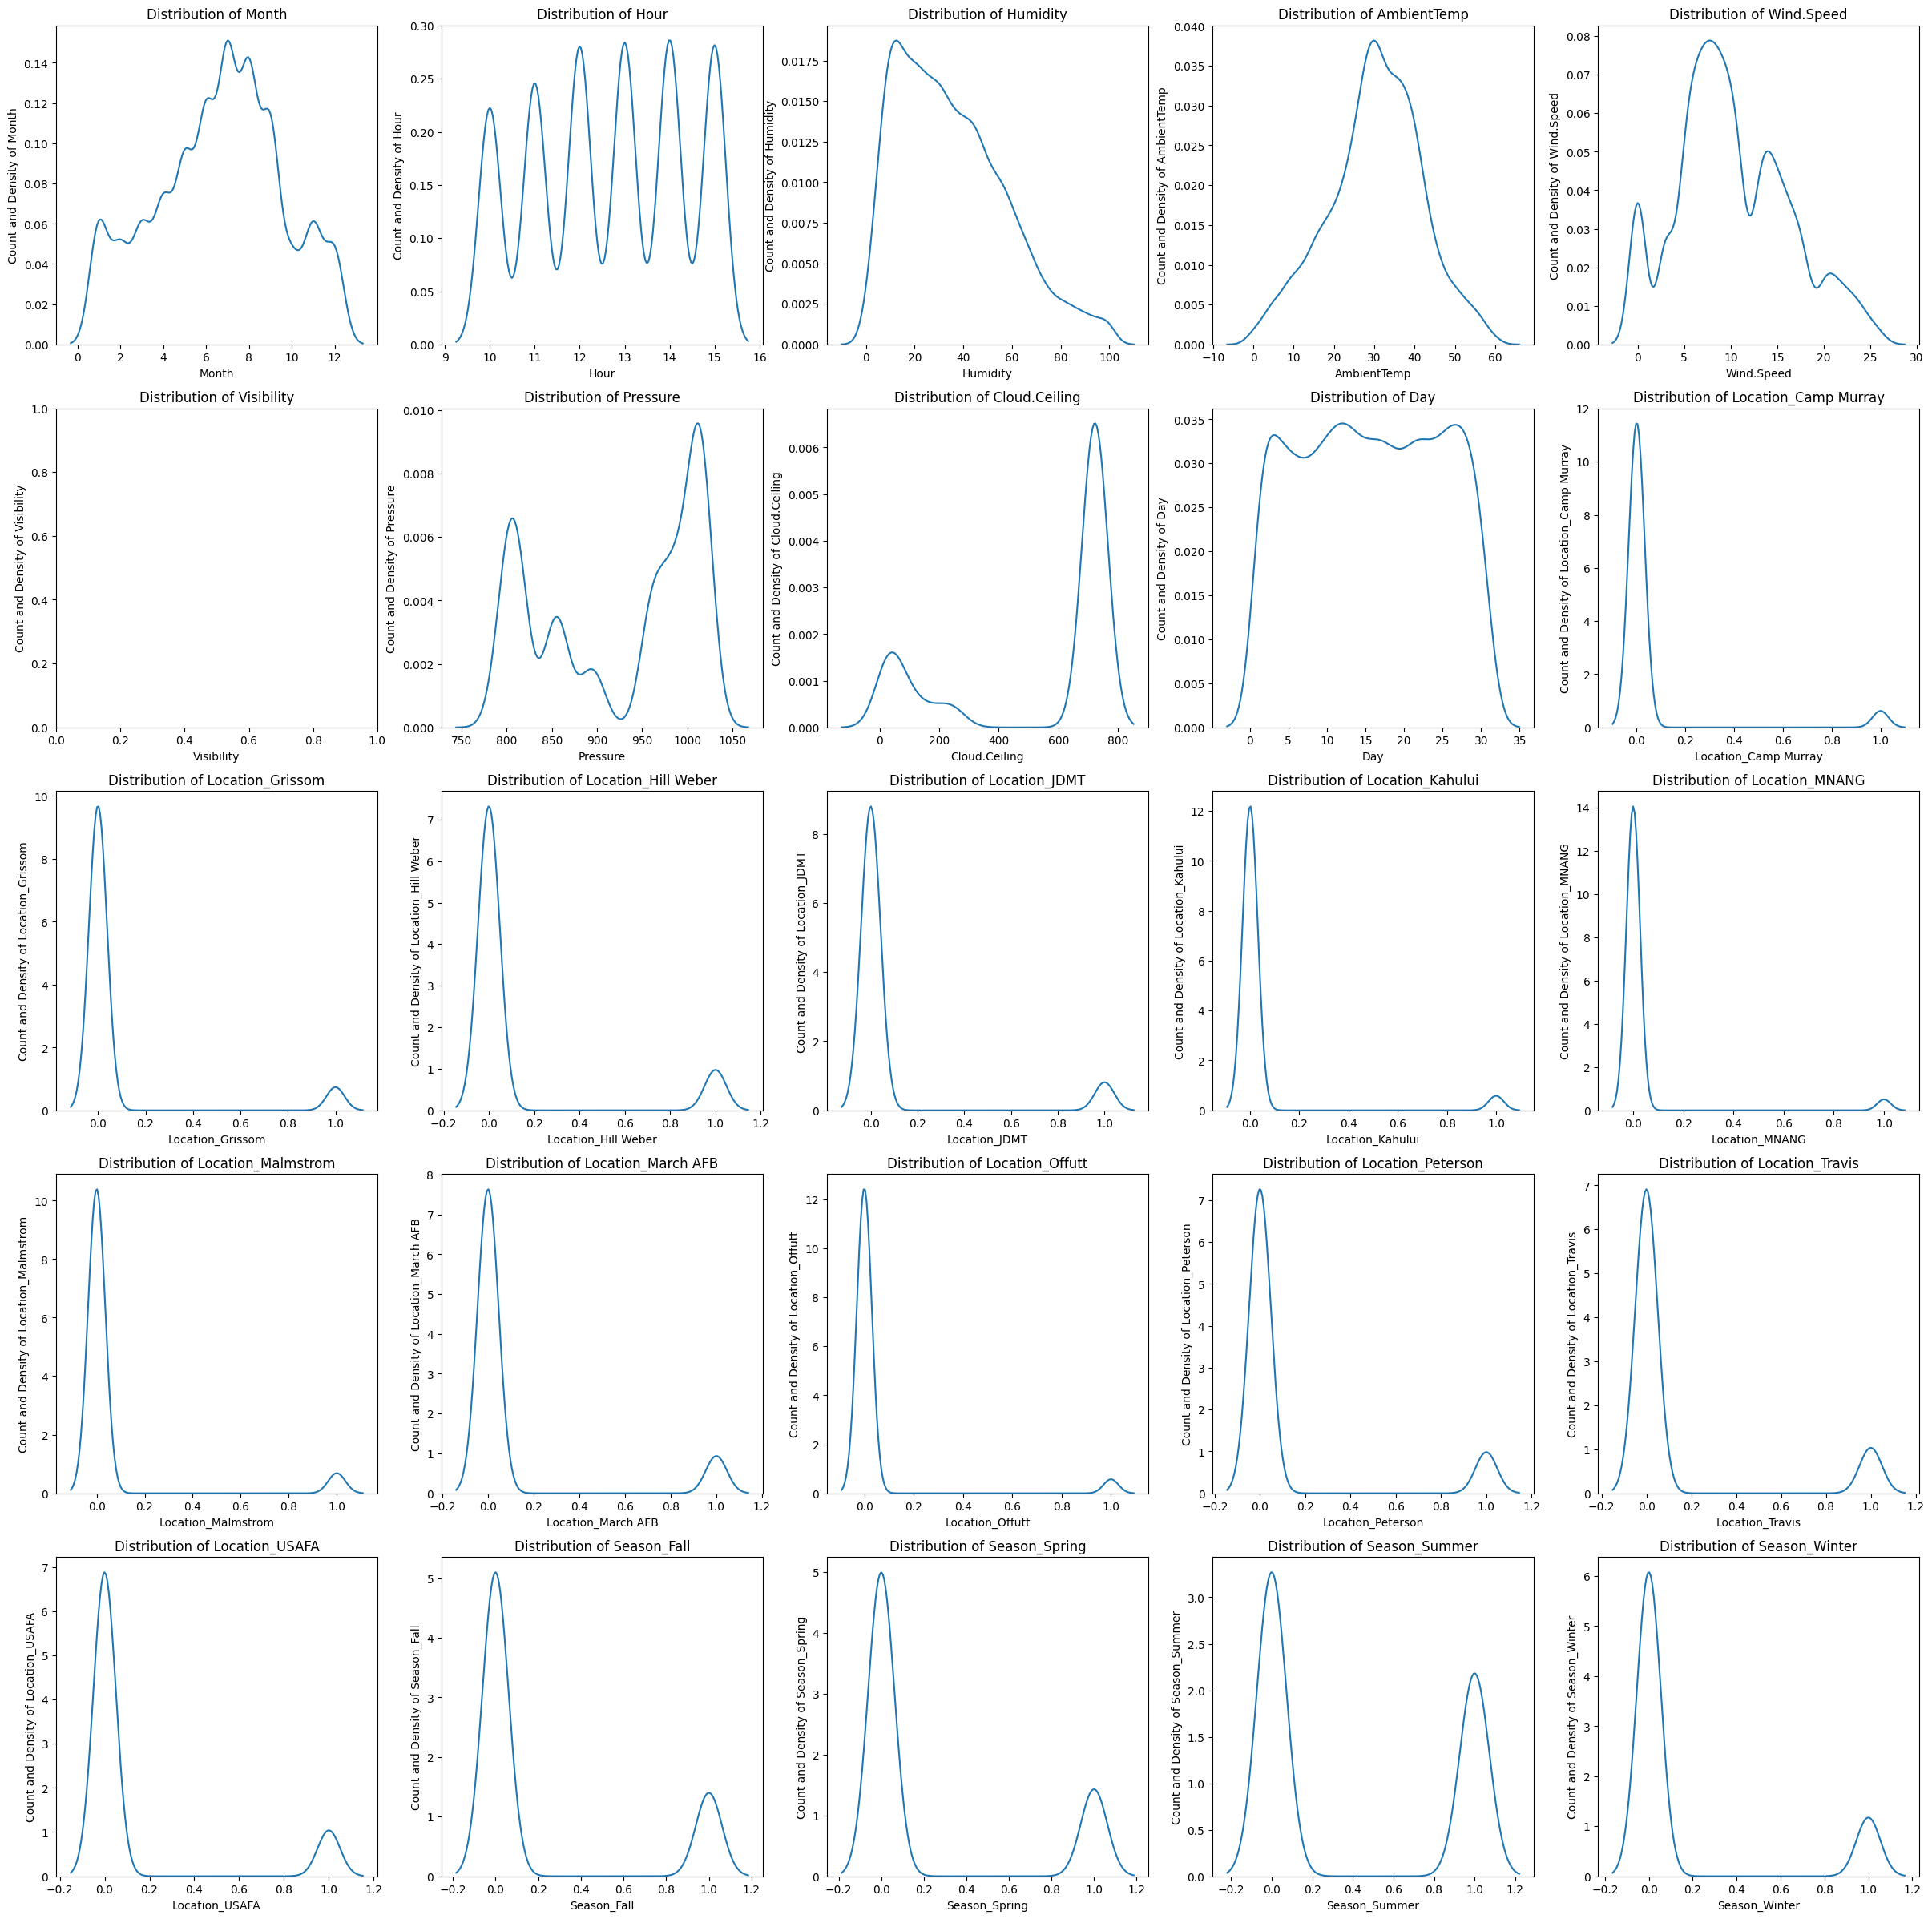

In [48]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

**Additional thing to remember about scaling multi-modal distribution**

- When dealing with features that have a multi-modal distribution, like the hour feature you mentioned with values [10, 11, 12, 13, 14, 15], scaling might not be as crucial as it is for some other types of data. Scaling is typically more important when working with algorithms that are sensitive to the scale of the input features, such as distance-based algorithms (e.g., k-nearest neighbors) or optimization algorithms (e.g., gradient descent).

- For categorical features like hours of the day, you might consider using techniques like one-hot encoding or ordinal encoding, depending on the nature of the data and the specific machine learning algorithm you plan to use. One-hot encoding represents each category as a binary column, while ordinal encoding assigns integer values based on the order of the categories.

- If you still want to scale the feature for some reason, you can use techniques like Min-Max scaling or Z-score normalization. However, keep in mind that the choice of scaling method might depend on the characteristics of your data and the requirements of your specific machine learning model. Since the hour feature has a limited range, scaling might not have a significant impact on its distribution. Always consider the context and the characteristics of your data when deciding whether or not to scale a particular feature.

In [49]:
x_train.columns

Index(['Month', 'Hour', 'Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility',
       'Pressure', 'Cloud.Ceiling', 'Day', 'Location_Camp Murray',
       'Location_Grissom', 'Location_Hill Weber', 'Location_JDMT',
       'Location_Kahului', 'Location_MNANG', 'Location_Malmstrom',
       'Location_March AFB', 'Location_Offutt', 'Location_Peterson',
       'Location_Travis', 'Location_USAFA', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

We will do scaling for non-binary features that we got in encoding process, so we will do this on Humidity, AmbientTemp, Wind.Speed, Visibility, Pressure, and Cloud.Ceiling

In [50]:
# #Normalization (MinMaxScaller)
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()

# columns_to_scale = ['Income', 'Age', 'Experience', 'Income_Age_Ratio', 'Profession', 'City', 'State'] #pilih kolom tertentu untuk dilakukan scaling (sesuai keterangan mentor)
# # columns_to_scale = x_train.columns.to_list() #pilih semua kolom

# scale_features = x_train[columns_to_scale]
# for n in scale_features:
#   x_train[n] = ms.fit_transform(x_train[[n]])
#   x_test[n] = ms.fit_transform(x_test[[n]])
#   # scaler.to_pickle(filename)

In [51]:
#Standardization (Z-score normalization)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

columns_to_scale = ['Humidity', 'AmbientTemp', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling']

scale_features = x_train[columns_to_scale]
for n in scale_features:
  x_train[n] = ss.fit_transform(x_train[[n]])
  x_test[n] = ss.fit_transform(x_test[[n]])
  # scaler.to_pickle(filename)

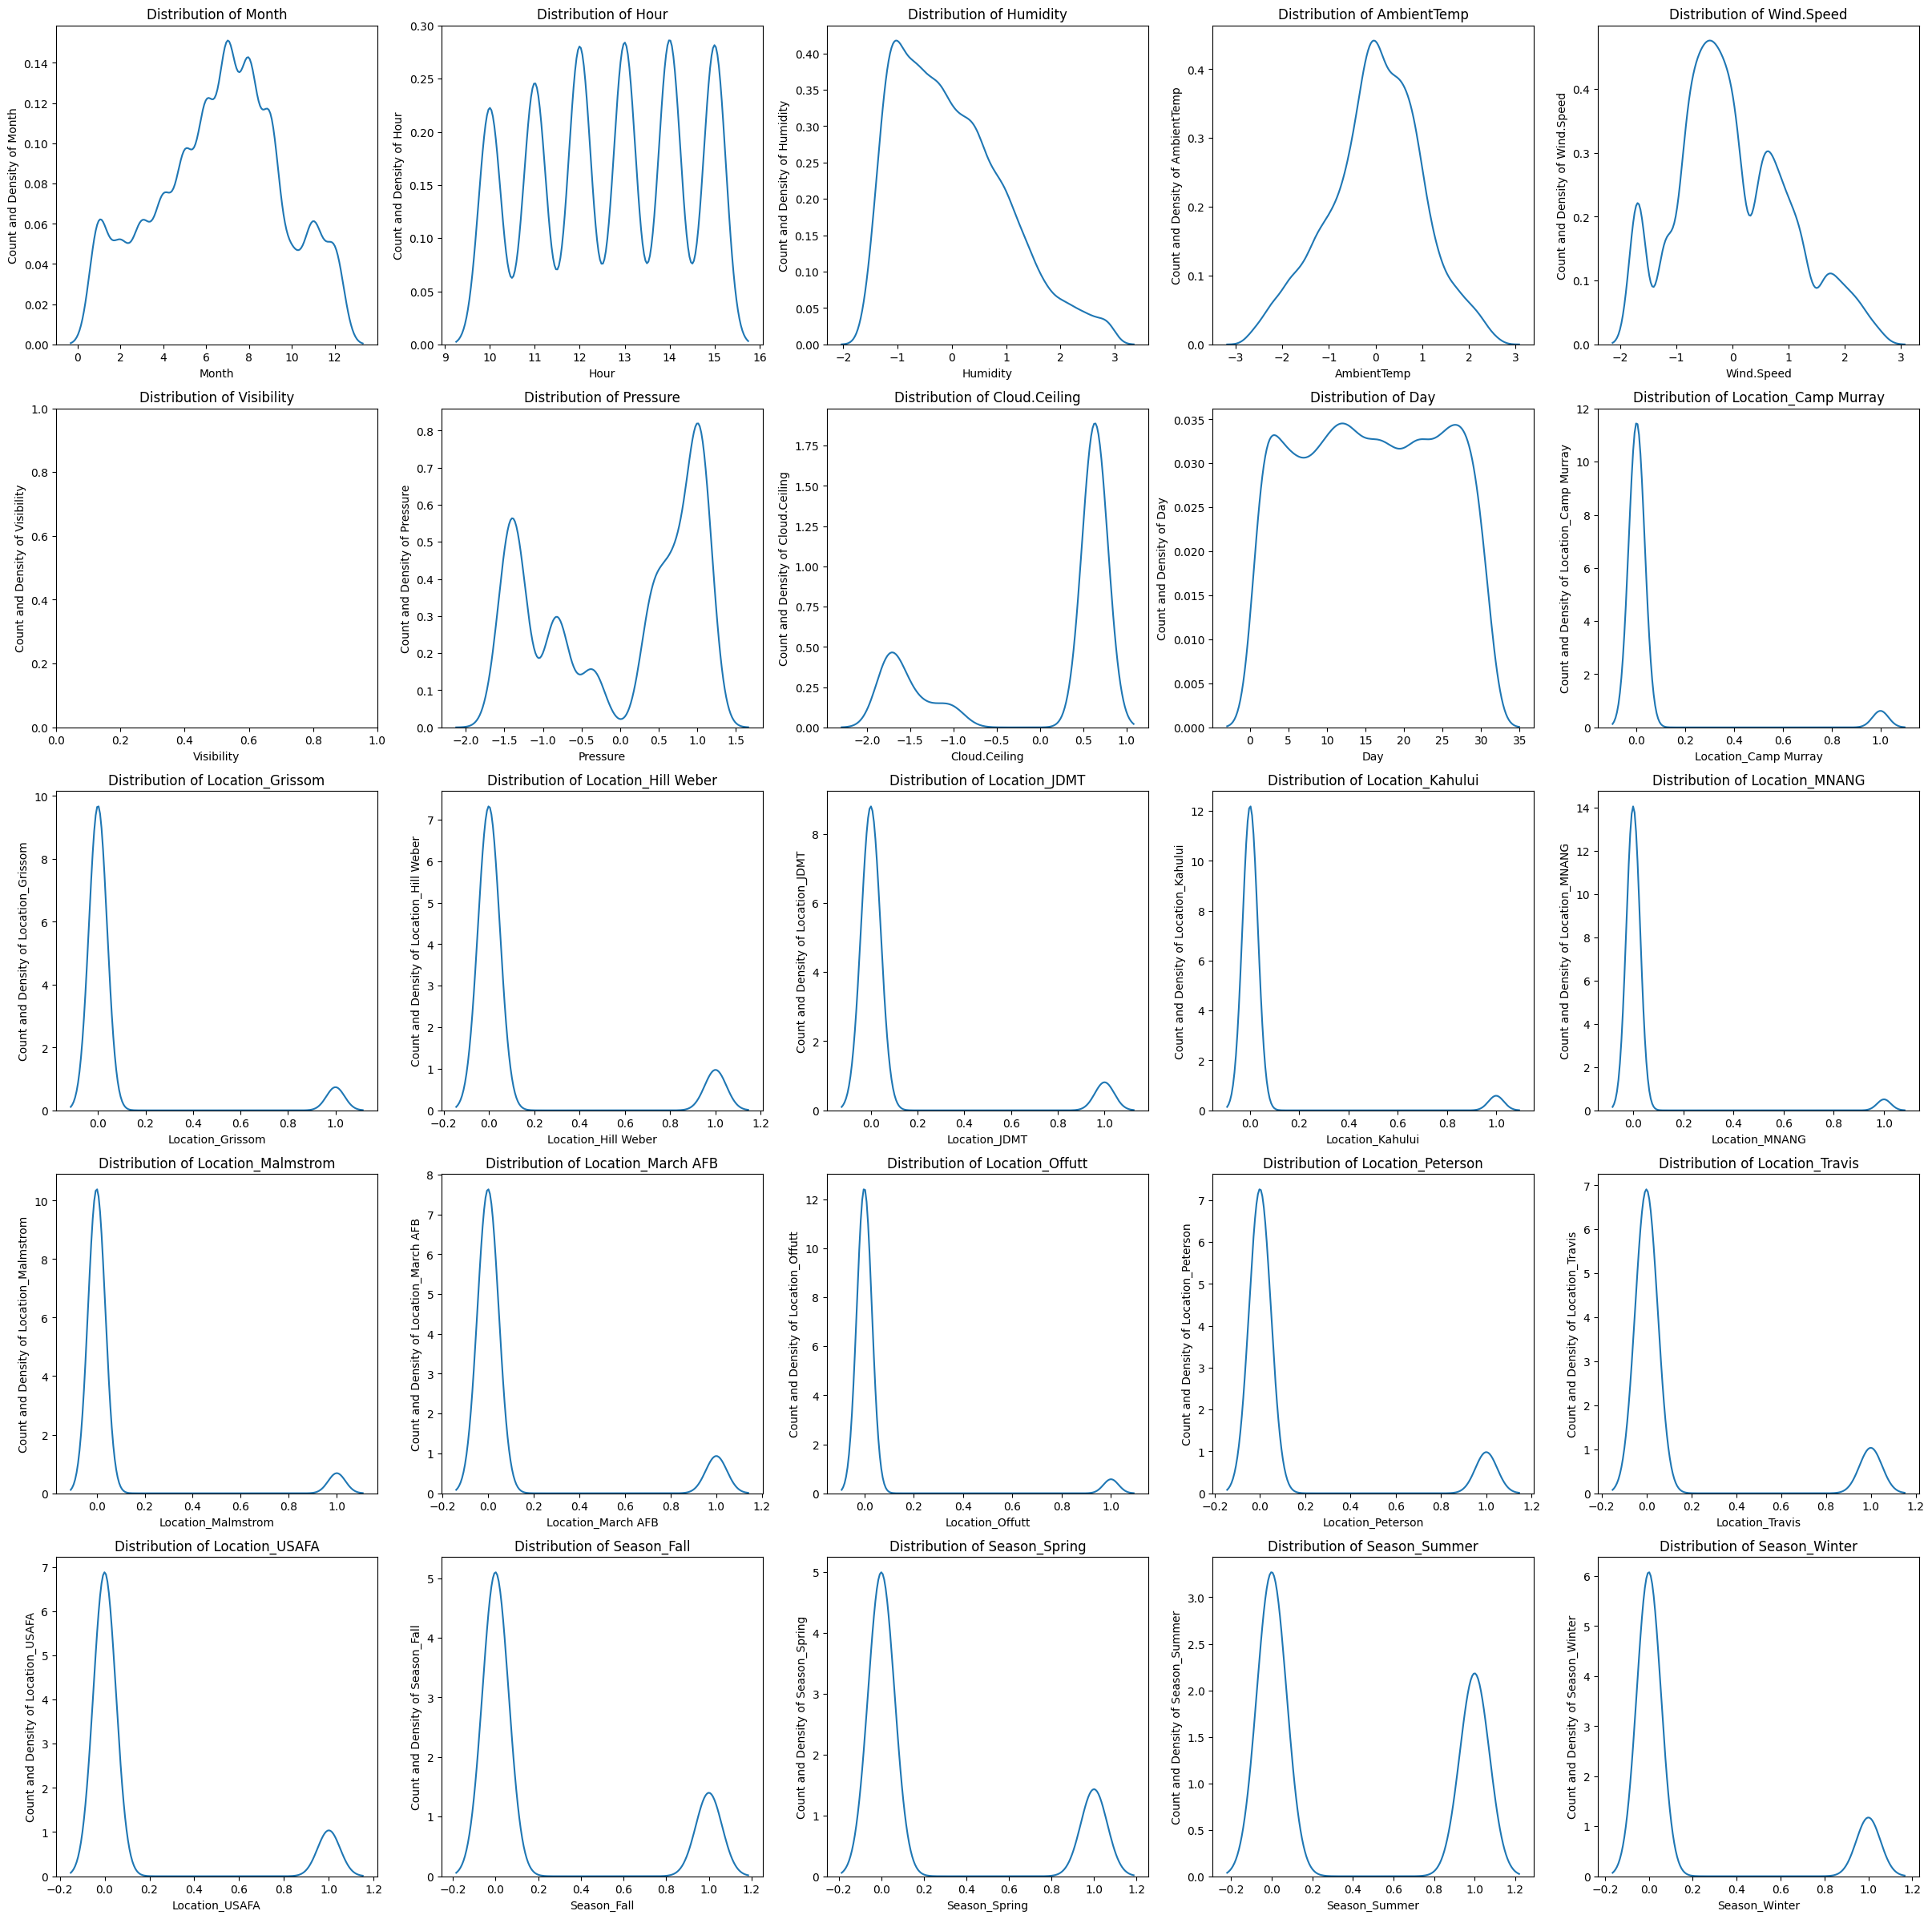

In [52]:
# Checking distribution before scaling
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(x_train.columns)) :
    sns.kdeplot(ax=axes[i], x=x_train[x_train.columns[i]])
    axes[i].set_title(f'Distribution of {x_train.columns[i]}')
    axes[i].set_ylabel(f'Count and Density of {x_train.columns[i]}')
    axes[i].set_xlabel(f'{x_train.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(x_train.columns) < len(axes) :
    axes[len(x_train.columns)].remove()

plt.tight_layout()

# Modelling

## Train Regression Models

In [53]:
len(x_train)

13478

In [54]:
len(y_train)

13478

In [55]:
len(x_test)

6314

In [56]:
len(y_test)

6314

In [57]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [58]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [59]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [60]:
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train, y_train)

ElasticNet()

In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [62]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [64]:
# Boosting : AdaBoost Regression
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)

AdaBoostRegressor()

In [65]:
# Boosting : XGBoost Regression
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation

In [66]:
#Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

#Function for model evaluation metrics score
def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  # print('MAE (train): ' + str(mean_absolute_error(y_test, y_pred_train)))
  print('MAE (test): ' + str(mean_absolute_error(y_test, y_pred)))

  # print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))
  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))

  # print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))
  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))

  # print('R2 (train): ' + str(r2_score(y_train, y_pred_train)))
  print('R2 (test): ' + str(r2_score(y_test, y_pred)))

  #Cross Validation
  score = cross_validate(model, x_train, y_train, cv=5, scoring='r2', return_train_score=True) #scoring change based on what metrics we want to validate (usually choose the main performance metric)
  print('R2 Score (crossval train): '+ str(score['train_score'].mean()))
  print('R2 Score (crossval test): '+ str(score['test_score'].mean()))


In [67]:
#Printing metrics score for all models to compare

#Linear Regression
print('\nEvaluate LinearRegression')
eval_regression(lr)

#Ridge Regressor
print('\nEvaluate RidgeRegression')
eval_regression(ridge)

#Lasso Regressor
print('\nEvaluate LassoRegression')
eval_regression(lasso)

#Elastic Net Regressor
print('\nEvaluate ElasticNetRegression')
eval_regression(elasticnet)

#Decision Tree Regressor
print('\nEvaluate DecisionTreeRegressor')
eval_regression(dt)

#Random Forest Regressor
print('\nEvaluate RandomForestRegressor')
eval_regression(rf)

#Support Vector Regressor
print('\nEvaluate SVR')
eval_regression(svr)

#AdaBoost Regressor
print('\nEvaluate AdaBoostRegressor')
eval_regression(ab)

#XGBoost Regressor
print('\nEvaluate XGBRegressor')
eval_regression(xg)

Evaluate LinearRegression
MAE (test): 384381546.524225
RMSE (test): 945221831.907305
MAPE (test): 86652247.62650523
r2 (test): -1.7543422302307984e+16
R2 Score (crossval train): 0.5177048868047509
R2 Score (crossval test): 0.5151032534046467
Evaluate RidgeRegression
MAE (test): 3.751564913417885
RMSE (test): 4.858690379110894
MAPE (test): 0.7462236822183446
r2 (test): 0.5364620683067971
R2 Score (crossval train): 0.5176805200875897
R2 Score (crossval test): 0.5151402353083381
Evaluate LassoRegression
MAE (test): 4.6882551430698856
RMSE (test): 5.688823349184978
MAPE (test): 0.9882354878297834
r2 (test): 0.3645348676722173
R2 Score (crossval train): 0.3380819978816506
R2 Score (crossval test): 0.3373951566072594
Evaluate ElasticNetRegression
MAE (test): 4.751806881550843
RMSE (test): 5.724012791409402
MAPE (test): 1.009868685235081
r2 (test): 0.35664893990605684
R2 Score (crossval train): 0.3314709352581079
R2 Score (crossval test): 0.33041433150166594

Evaluate DecisionTreeRegressor
MA

### Feature Importance in Linear Models

In [ ]:
#Check features
x_train.columns

Index(['category_id', 'likes', 'dislikes', 'No_tags', 'desc_len',
       'diff_publish_trending', 'comments_disabled_False',
       'comments_disabled_True', 'ratings_disabled_False',
       'ratings_disabled_True', 'video_error_or_removed_False',
       'video_error_or_removed_True'],
      dtype='object')

In [ ]:
#Initialize series of coef
lr_coef = pd.Series(lr.coef_)
ridge_coef = pd.Series(ridge.coef_)
lasso_coef = pd.Series(lasso.coef_)
elasticnet_coef = pd.Series(elasticnet.coef_)

# Creating a DataFrame with coefficients
linear_model_coef = pd.DataFrame({'lr_coef': lr_coef, 'ridge_coef': ridge_coef, 'lasso_coef': lasso_coef, 'elasticnet_coef': elasticnet_coef})

# Display coef DataFrame
linear_model_coef

lr_coef     ridge_coef    lasso_coef  elasticnet_coef
0    -9699.689836   -9696.188159 -9.697723e+03     -6959.013902
1    47780.546368   47788.611422  4.778086e+04     58981.220925
2   209728.061514  209699.307906  2.097261e+05    133861.825894
3     1417.352930    1417.181418  1.417324e+03      2055.170512
4    20379.955560   20376.812344  2.037866e+04     13218.025556
5    70646.689776   70649.553755  7.064610e+04     62685.841233
6     6838.100295    6785.157519  1.363545e+04     -2599.005596
7    -6838.100295   -6785.157519 -1.884064e-11      2599.005566
8  -123599.623944 -123390.618673 -2.471428e+05     -8059.476368
9   123599.623944  123390.618673  6.388400e-10      8059.476359
10       0.000000       0.000000  0.000000e+00         0.000000
11       0.000000       0.000000  0.000000e+00         0.000000

# Summary of Models Generated by Various Machine Learning Algorithms

Experiment was conducted on the models below :

1. Linear Regression (with regularization : Ridge, Lasso, and Elastic Net)
2. Decision Tree Regression
3. Random Forest Regression
4. Support Vector Regression
5. Gradient Boosting Regression (AdaBoost and XGBoost)

From all of the models, the best results were obtained by:

- **Random Forest Regression**
- **XGBoost Regression**

Therefore, hyperparameter tuning can be applied to these two models to slightly improve their results (for other models that also have decent performance, experiments will be conducted if there is time and additional resources available).

## Feature Importances from Regression Models

In [68]:
#Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')

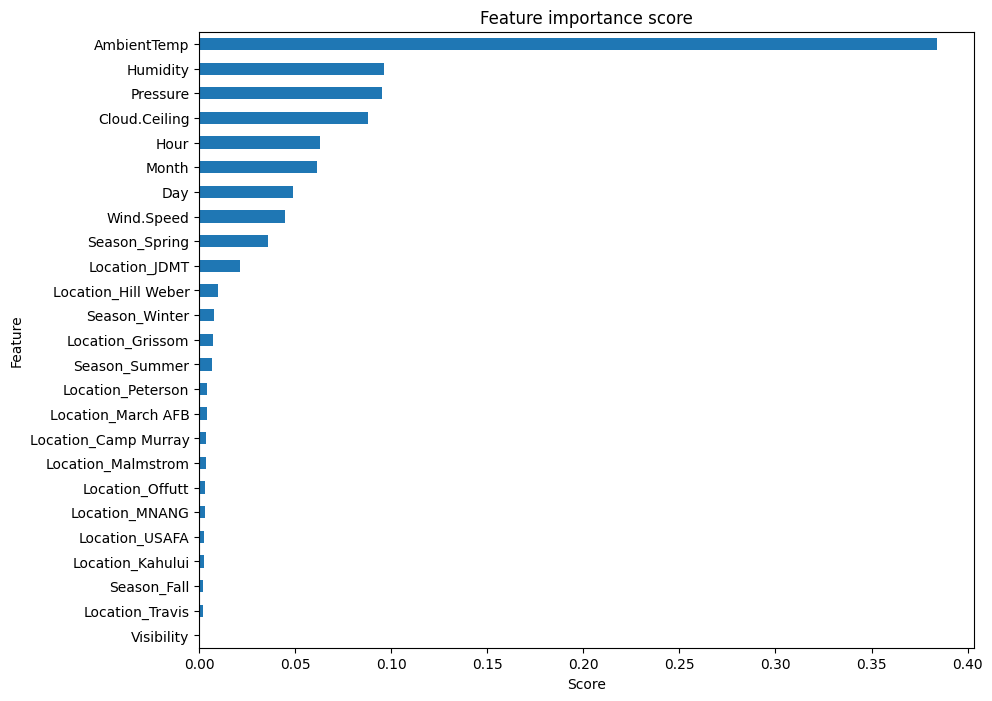

In [69]:
# Feature importance in random forest
show_feature_importance(rf)

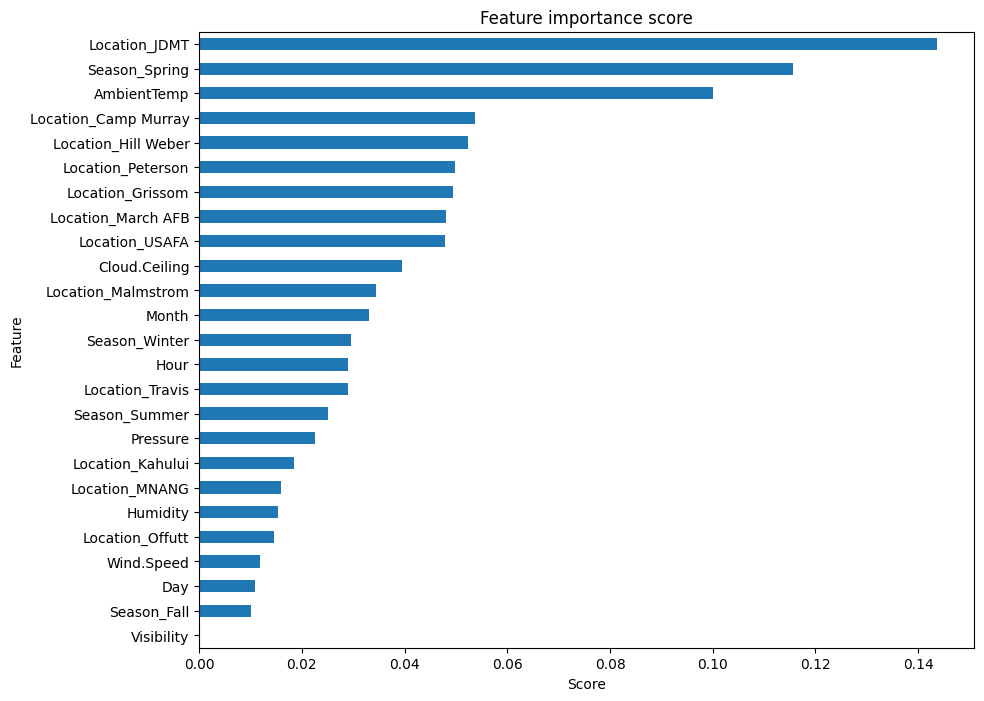

In [70]:
# Feature importance in XGB
show_feature_importance(xg)

## Hyperparameter Tuning

In [71]:
#Function for best hyperparameters found during the tuning process
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Hyperparameter Tuning For Random Forest Regression

<b>Commonly tuned hyperparameters in Random Forest:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>Sklearn Random Forest Documentation</a>)

- n_estimators: the number of trees to be built in the forest.
- max_samples: the maximum number of samples to be drawn from the total training set for building each tree (after the bootstrap process).

The remaining hyperparameters are the same as in Decision Trees:

- criterion: the method used to measure impurity in features (gini, entropy). This is for classification; for regression, it's different. It determines which feature becomes the root/node (squared_error, poisson).
- max_depth: the maximum depth of each tree to prevent overfitting.
- min_sample_split: the minimum number of samples required at a node to create a new leaf (to avoid having too few samples, which can lead to overfitting).
- min_sample_leaf: the minimum number of samples required in a leaf for the leaf to be formed (to avoid having too few samples, which can lead to overfitting).
- ccp_alpha: if the cost/error of a leaf/subtree is greater than ccp_alpha, that subtree will be pruned, minimizing the error/variance of the model.

In [72]:
# Hyperparameter Tuning for random forest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
n_estimators = [int(x) for x in np.linspace(50, 180, 5)]
criterion = ['squared_error', 'poisson']
max_depth = [int(x) for x in np.linspace(50, 180, 5)]
min_samples_split = [int(x) for x in np.linspace(2, 10, 2)]
min_samples_leaf = [int(x) for x in np.linspace(2, 10, 2)]

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion, 
                       max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf)

#Initiate tuned model
rf = RandomForestRegressor()
# rf_tuned = GridSearchCV(dt, hyperparameters, cv=5, scoring='r2')
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring='r2', cv=5, error_score='raise')
rf_tuned.fit(x_train, y_train)

#Tuned model evaluation
eval_regression(rf_tuned)

MAE (test): 2.834572928058954
RMSE (test): 4.190132605838906
MAPE (test): 0.5657921769298012
r2 (test): 0.6552515164971378
R2 Score (crossval train): 0.8923598419055253
R2 Score (crossval test): 0.6325092441834683


In [73]:
# Best hyperparameter in random forest
show_best_hyperparameter(rf_tuned)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 82, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 180, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [74]:
# Retrieving the best hyperparameters for random forest (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = rf_tuned.best_params_
best_params

{'n_estimators': 180,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 82,
 'criterion': 'squared_error'}

In [76]:
# #Learning curve for hyperparameters

# # Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# # param_values = [int(x) for x in np.linspace(50, 180, 5)] # n_estimators
# # param_values = [int(x) for x in np.linspace(50, 180, 5)] # max_depth
# # param_values = [int(x) for x in np.linspace(2, 10, 2)] # min_samples_split
# param_values = [int(x) for x in np.linspace(2, 10, 2)] # min_samples_leaf

# train_scores = []
# test_scores = []

# for i in param_values:
#     model = RandomForestRegressor(min_samples_leaf=i) # Change based on what hyperparameter that we used
#     model.fit(x_train, y_train)

#     # eval on train
#     y_pred_train_proba = model.predict_proba(x_train)
#     train_r2 = r2_score(y_train, y_pred_train_proba[:,1])
#     train_scores.append(train_r2)

#     # eval on test
#     y_pred_proba = model.predict_proba(x_test)
#     test_r2 = r2_score(y_test, y_pred_proba[:,1])
#     test_scores.append(test_r2)

#     print('Param value: ' + str(i) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

# plt.title('Learning Curve | Hyperparameter : min_sample_leaf | Random Forest') # Change based on what hyperparameter that we used
# plt.ylabel('R2 Score')
# plt.xlabel('min_sample_leaf') # Change based on what hyperparameter that we used
# plt.plot(param_values, train_scores, label='Train')
# plt.plot(param_values, test_scores, label='Test')
# plt.legend()
# plt.show()

### Hyperparameter Tuning For XGBoost Regression

<b>Commonly tuned hyperparameters in XGBoost:</b>  (<a href='https://xgboost.readthedocs.io/en/latest/parameter.html'>XGBoost Documentation</a>)

- <b>Tree architecture-related:</b>
    - max_depth: the maximum depth of the tree to prevent overfitting.
    - min_child_weight: the minimum weight (or the number of samples if the total weight equals 1) a node should have to create a new leaf (to avoid having too few, causing overfitting).
    - gamma: the minimum loss/error reduction required to make a new leaf.
    - tree_method: the method XGBoost uses to build a tree. The algorithm we are learning is tree_method = exact. Other references can be found <a href='https://xgboost.readthedocs.io/en/latest/treemethod.html'>here</a>.

- <b>Boosting process subsampling:</b> Instead of using the entire training data in each iteration, we can use a sample in each iteration.
    - subsample: how much of the row samples to be used for sampling at each step. 1 for all rows.
    - colsample_bytree: how many features to be used. 1 for all features.

- <b>Control learning rate:</b>
    - eta: the step size for updating the feature weight in XGBoost, value range: 0-1. Smaller eta provides more fine-grained corrections but requires more boosting iterations.
        - In sklearn, the hyperparameter name is learning_rate.

- <b>Regularization in XGBoost:</b>
    - lambda: the regularization term on L2 norm.
    - alpha: the regularization term on L1 norm.

- <b>Learning task in XGBoost:</b>
    - objective: the objective function used, such as calculating error in regression.
    - eval_metric: evaluation metrics used on the validation data (e.g., rmse, mae, auc).
    - seed: random state.

- <b>Others:</b>
    - scale_pos_weight: if the data is imbalanced, this parameter is used to adjust the weight of each label.
    
- <b>Other parameters for model checking and debugging:</b>
    - verbose: to display detailed log information during the model training. 0: no messages; 1: display warnings only; 2: display info (deprecated examples); 3: debug: detailed training information for the model.

In [77]:
#Hyperparameter tuning for xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Initiate hyperparameters used and their values
max_depth = [int(x) for x in np.linspace(5, 20, 11)]
min_child_weight = [int(x) for x in np.linspace(1, 20, 11)]
gamma = [float(x) for x in np.linspace(0, 3, num = 11)]
tree_method = ['auto', 'exact', 'approx']

colsample_bytree = [float(x) for x in np.linspace(0, 1, 11)]
eta = [float(x) for x in np.linspace(0, 1, num = 100)]

# lambda = [float(x) for x in np.linspace(0, 1, 11)]
alpha = [float(x) for x in np.linspace(0, 1, 11)]

#Collecting all hyperparameters into a single dictionary
hyperparameters = dict(max_depth=max_depth, 
                       min_child_weight=min_child_weight, 
                       gamma=gamma,
                       tree_method=tree_method,
                       colsample_bytree=colsample_bytree,
                       eta=eta,
                       alpha=alpha)

#Initiate tuned model
xg = XGBRegressor()
# xg_tuned = GridSearchCV(xg, hyperparameters, cv=5, scoring='r2')
xg_tuned = RandomizedSearchCV(xg, hyperparameters, scoring='r2', cv=5, error_score='raise')
xg_tuned.fit(x_train,y_train)

# Evaluation
eval_regression(xg_tuned)

MAE (test): 2.976608475380995
RMSE (test): 4.201045271603949
MAPE (test): 0.5857991856414323
r2 (test): 0.65345347127276
R2 Score (crossval train): 0.785307462246839
R2 Score (crossval test): 0.6220226011177914


In [78]:
# Best hyperparameter in xgb
show_best_hyperparameter(xg_tuned)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6000000000000001, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': 18, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': 'exact', 'validate_parameters': None, 'verbosity': None, 'eta': 0.04040404040404041, 'alpha': 0.2}


In [79]:
# Retrieving the best hyperparameters for xgb (similar to show_best_hyperparameter code before, but only shows the ones that we used)
best_params = xg_tuned.best_params_
best_params

{'tree_method': 'exact',
 'min_child_weight': 18,
 'max_depth': 8,
 'gamma': 0.0,
 'eta': 0.04040404040404041,
 'colsample_bytree': 0.6000000000000001,
 'alpha': 0.2}

In [80]:
# #Learning curve for hyperparameters

# # Hyperparameter that will be tested and their values (can be found in best hyperparameter before or experiment with others)
# # param_values = [int(x) for x in np.linspace(5, 20, 11)] #max_depth
# # param_values = [int(x) for x in np.linspace(1, 20, 11)] #min_child_weight
# # param_values = [float(x) for x in np.linspace(0, 3, num = 11)] #gamma
# # param_values = ['auto', 'exact', 'approx'] #tree_method
# # param_values = [float(x) for x in np.linspace(0, 1, 11)] #colsample_bytree
# # param_values = [float(x) for x in np.linspace(0, 1, 100)] #eta
# # param_values = [float(x) for x in np.linspace(0, 1, 11)] #lambda
# param_values = [float(x) for x in np.linspace(0, 1, 11)] #alpha

# train_scores = []
# test_scores = []

# for i in param_values:
#     model = XGBRegressor(alpha=i) # Change based on what hyperparameter that we used
#     model.fit(x_train, y_train)

#     # eval on train
#     y_pred_train_proba = model.predict_proba(x_train)
#     train_r2 = r2_score(y_train, y_pred_train_proba[:,1])
#     train_scores.append(train_r2)

#     # eval on test
#     y_pred_proba = model.predict_proba(x_test)
#     test_r2 = r2_score(y_test, y_pred_proba[:,1])
#     test_scores.append(test_r2)

#     print('Param value: ' + str(i) + '; train: ' + str(train_r2) + '; test: '+ str(test_r2))

# plt.title('Learning Curve | Hyperparameter : alpha | XGB') # Change based on what hyperparameter that we used
# plt.ylabel('AUC')
# plt.xlabel('alpha') # Change based on what hyperparameter that we used
# plt.plot(param_values, train_scores, label='Train')
# plt.plot(param_values, test_scores, label='Test')
# plt.legend()
# plt.show()